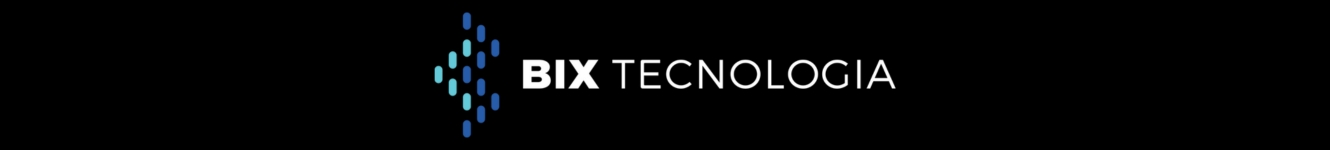

# Data Science Challenge Notebook

**Este notebook contém a análise e o modelo para otimização de planejamento de manutenção de um sistema de ar em caminhões.**

# Etapas

#### 1. Análise Exploratória de Dados (EDA)
- **Inspeção Inicial**: Carregamento dos dados de diferentes anos para inspeção visual e estatística básica.
- **Distribuição das Classes**: Análise da distribuição das classes nos dados do ano presente e dos anos anteriores.
- **Descrição Estatística**: Cálculo de estatísticas descritivas para compreender as principais características dos dados.

#### 2. Limpeza e Preparação de Dados
- **Combinação de DataFrames**: União dos dados de anos anteriores com os dados do ano presente.
- **Conversão de Tipos de Dados**: Conversão de colunas para tipos numéricos, tratando valores não convertíveis.
- **Configuração de Exibição**: Ajuste das configurações do pandas para melhor visualização dos dados.

#### 3. Redução de Dimensionalidade
- **Seleção de Features Numéricas**: Identificação das colunas numéricas para análise e modelagem.
- **Remoção de Colunas Irrelevantes**: Exclusão de colunas que não contribuem para a previsão.

#### 4. Construção de Modelos
- **Divisão dos Dados**: Separação dos dados em conjuntos de treinamento e teste.
- **Pipeline de Modelagem**: Construção de um pipeline de pré-processamento e modelagem utilizando `RandomForestClassifier` e `StandardScaler`.

#### 5. Avaliação de Modelos
- **Treinamento e Validação Cruzada**: Treinamento do modelo e avaliação com validação cruzada, calculando métricas como acurácia, precisão, recall e F1-score.

#### 6. Interpretação de Modelos
- **Importância de Características**: Utilização de técnicas para entender quais características são mais importantes para as previsões do modelo.

#### 7. Validação no Conjunto de Teste
- **Previsões e Matriz de Confusão**: Realização de previsões no conjunto de teste e geração da matriz de confusão para análise de desempenho.
- **Avaliação de Impacto Financeiro**: Cálculo dos custos associados a falsos positivos, falsos negativos e verdadeiros positivos, e estimativa do impacto financeiro total.

#### 8. Cálculo do Impacto Financeiro
- **Cálculo de Custos**: Estimativa do impacto financeiro baseado nos resultados das previsões, considerando custos de falsos positivos, falsos negativos e verdadeiros positivos.








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

**Análise Exploratória de Dados (EDA)**





In [32]:
path_present_year = '/content/drive/My Drive/bix_tecnologia/desafio_data_science/data/air_system_present_year.csv'
path_previous_years = '/content/drive/My Drive/bix_tecnologia/desafio_data_science/data/air_system_previous_years.csv'

In [ ]:
df_present_year = pd.read_csv(path_present_year)
df_previous_years = pd.read_csv(path_previous_years)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Visualizando as primeiras linhas
print("Dados do Ano Presente:")
print(df_present_year.head())
print("\nDados dos Anos Anteriores:")
print(df_previous_years.head())

# Descrição básica
print("\nDescrição dos Dados do Ano Presente:")
print(df_present_year.describe())
print("\nDescrição dos Dados dos Anos Anteriores:")
print(df_previous_years.describe())

# Contagem de valores únicos na coluna 'class' para entender a distribuição das classes
print("\nDistribuição das Classes - Ano Presente:")
print(df_present_year['class'].value_counts())

print("\nDistribuição das Classes - Anos Anteriores:")
print(df_previous_years['class'].value_counts())


Dados do Ano Presente:
  class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816     na   1010    936      0      0      0      0      0   
4   neg    1814     na    156    140      0      0      0      0      0   

   ag_003   ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0    2682     4736     3862     1846        0      0      0     3976      0   
1       0      748    12594     3636        0      0      0     5244      0   
2  199486  1358536  1952422   452706    25130    520      0  1891670      0   
3       0   123922   984314  1680050  1135268  92606  14038  1772828      0   
4       0       72    17926    82834     3114      0      0    48978      0   

  aj_000 ak_000 al_000    am_0   an_000   ao_000  a

In [ ]:
# Combinar os DataFrames
df_combined = pd.concat([df_previous_years, df_present_year], ignore_index=True)

**Conversão das Colunas Apropriadas para Numérico**



In [ ]:
# Identificar as colunas que não são 'class' e tentar convertê-las para numérico
cols_to_convert = df_combined.columns.drop('class')

# Converter colunas para numérico
for col in cols_to_convert:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

# Verificar a estrutura do DataFrame após conversão
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 99.2+ MB
None


**Histograma de Todas as Features Numéricas**

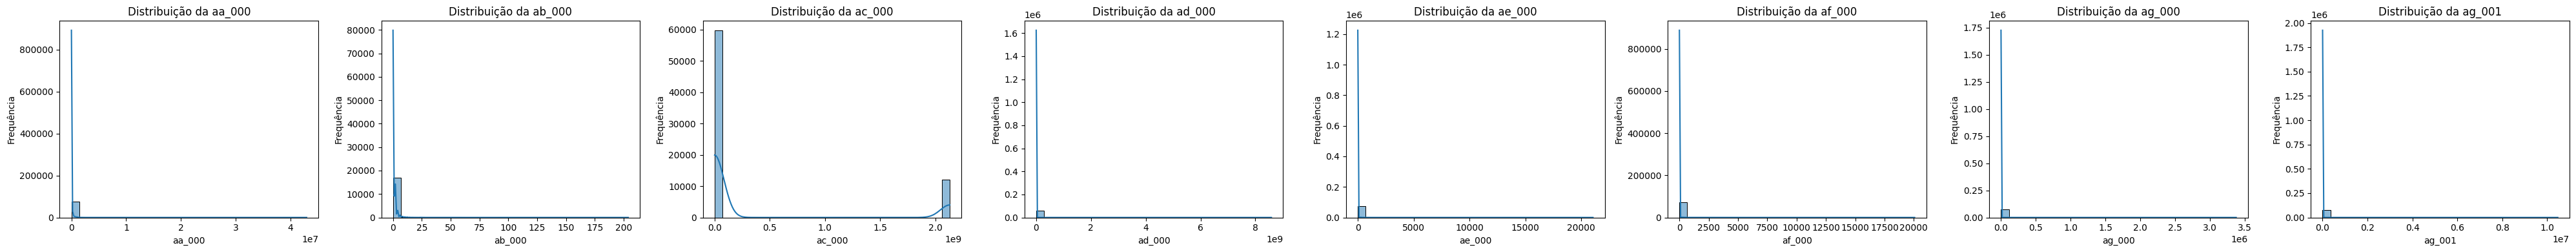

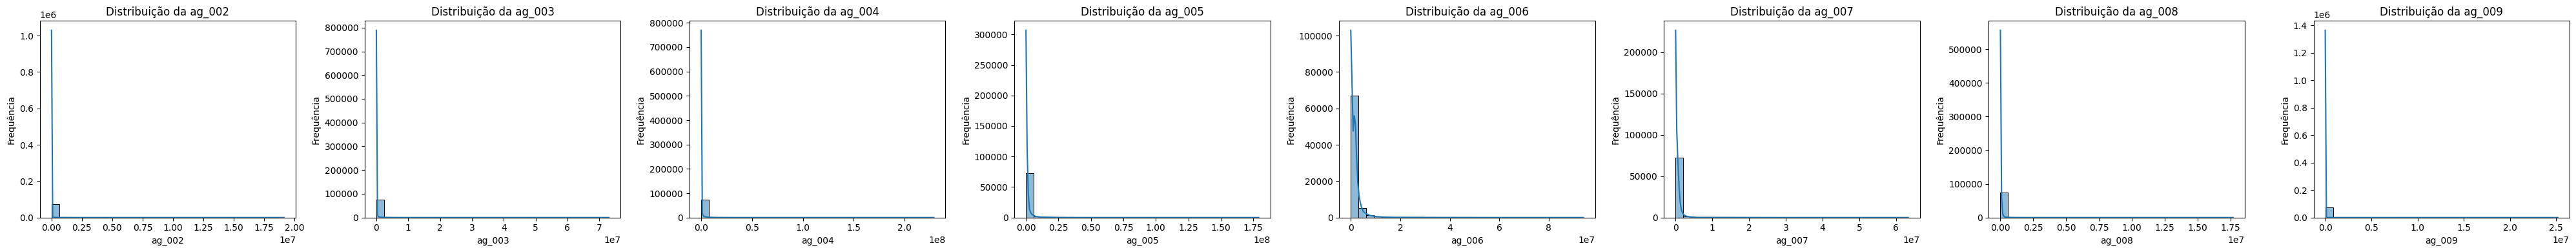

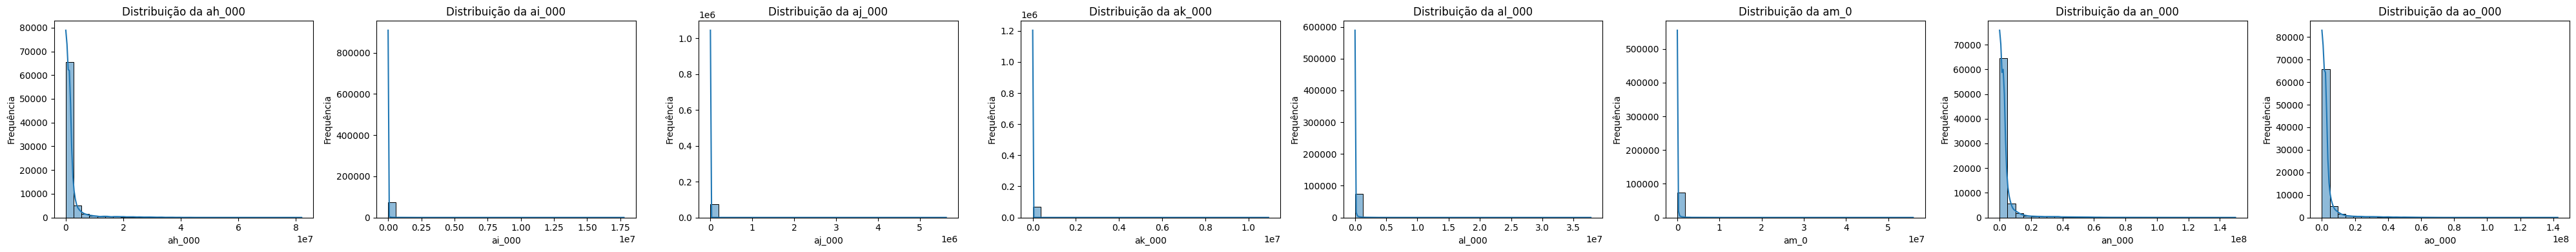

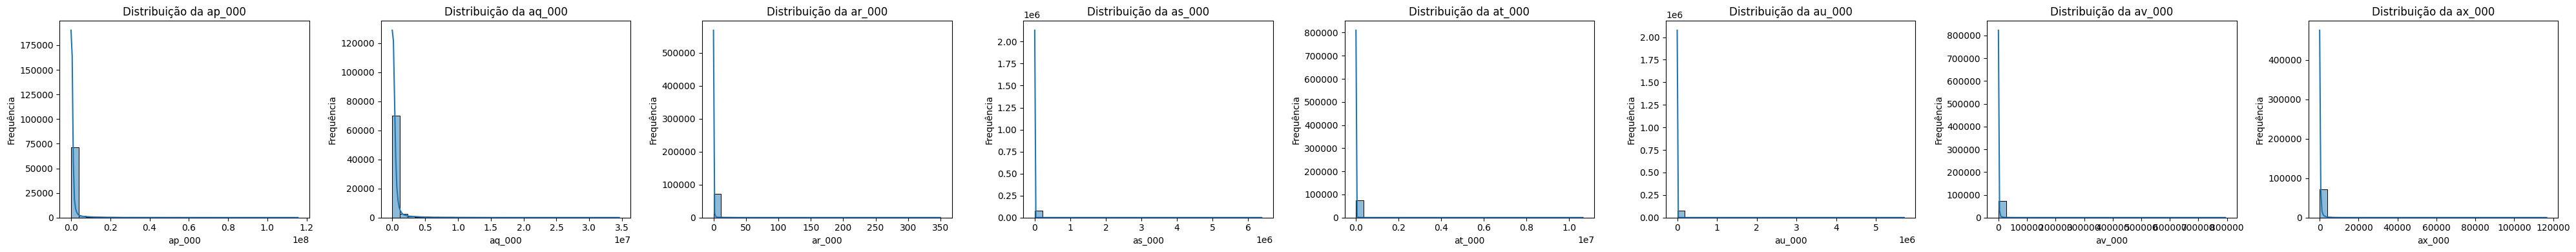

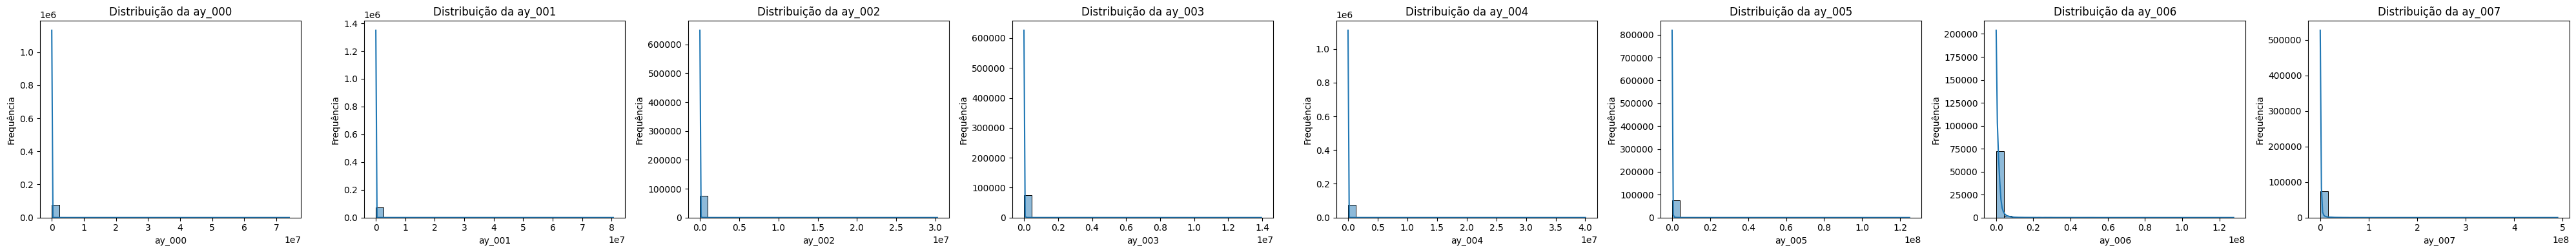

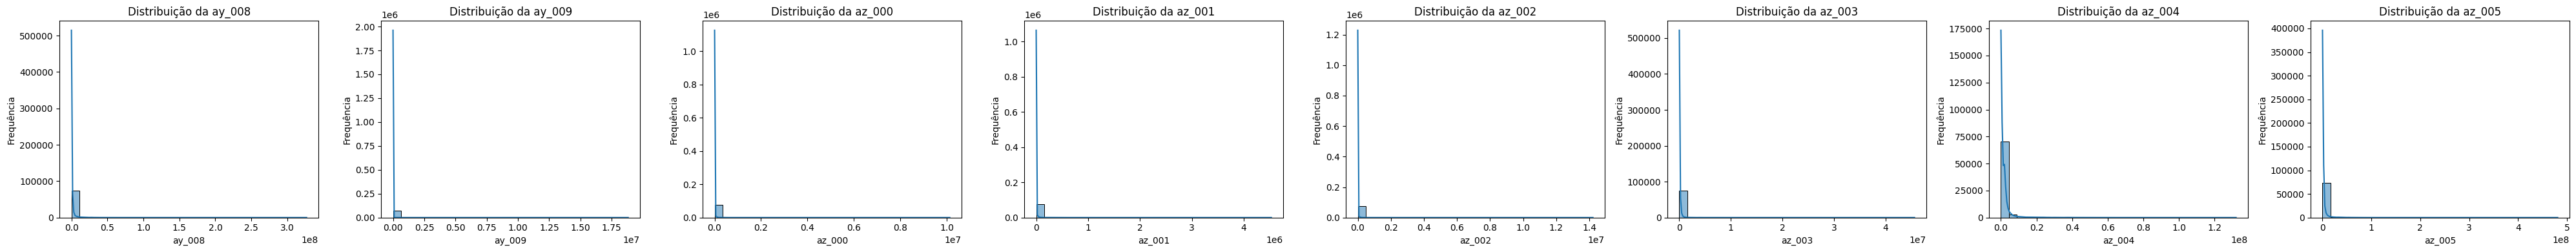

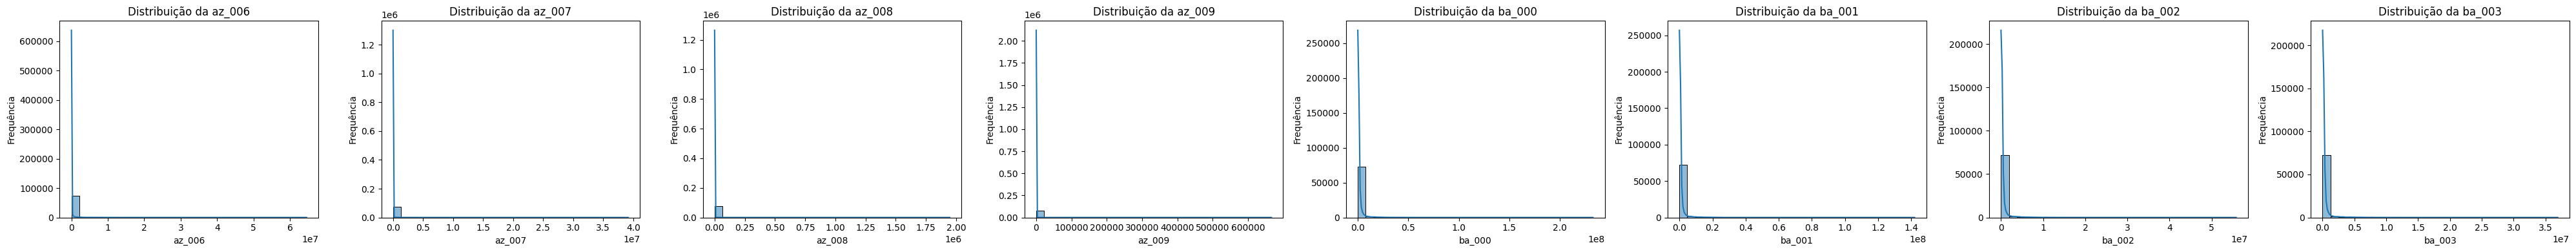

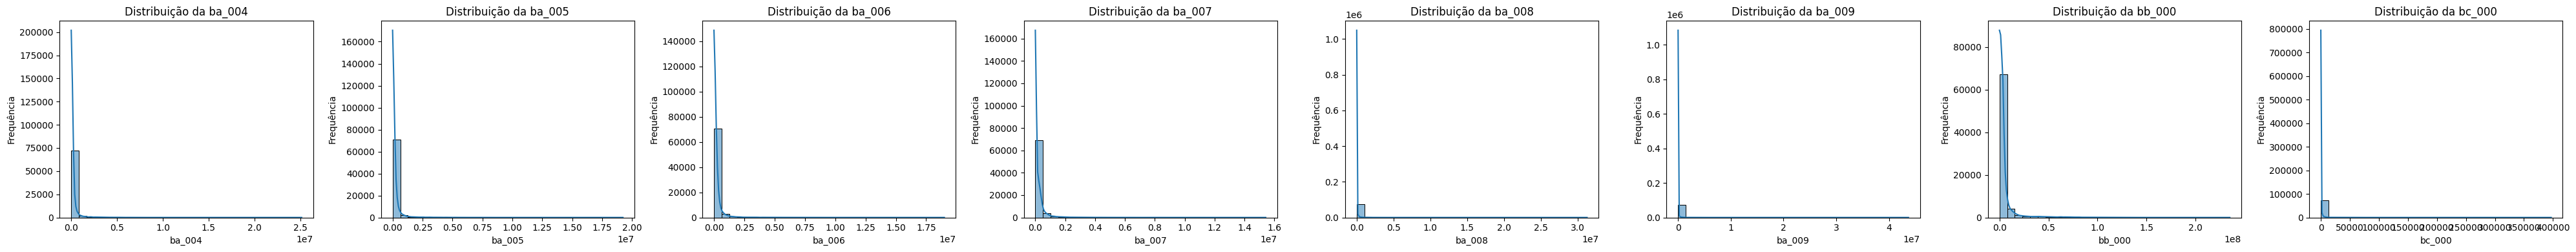

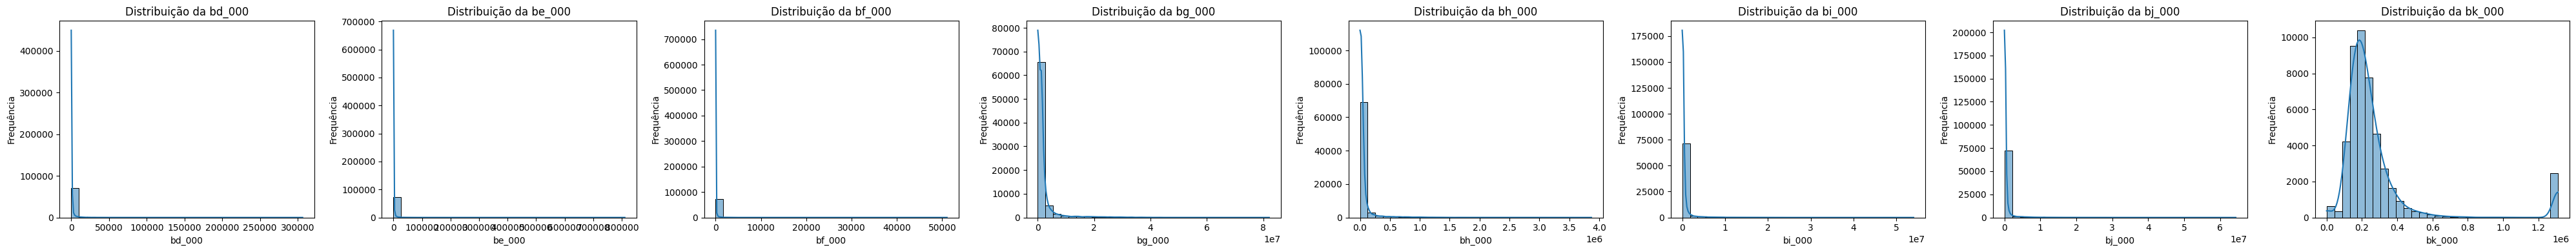

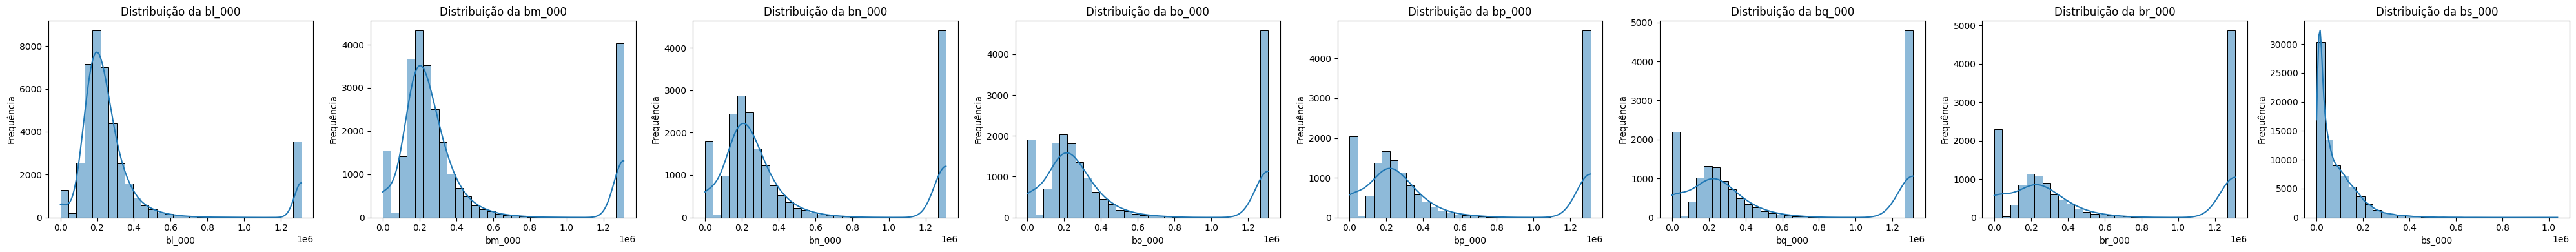

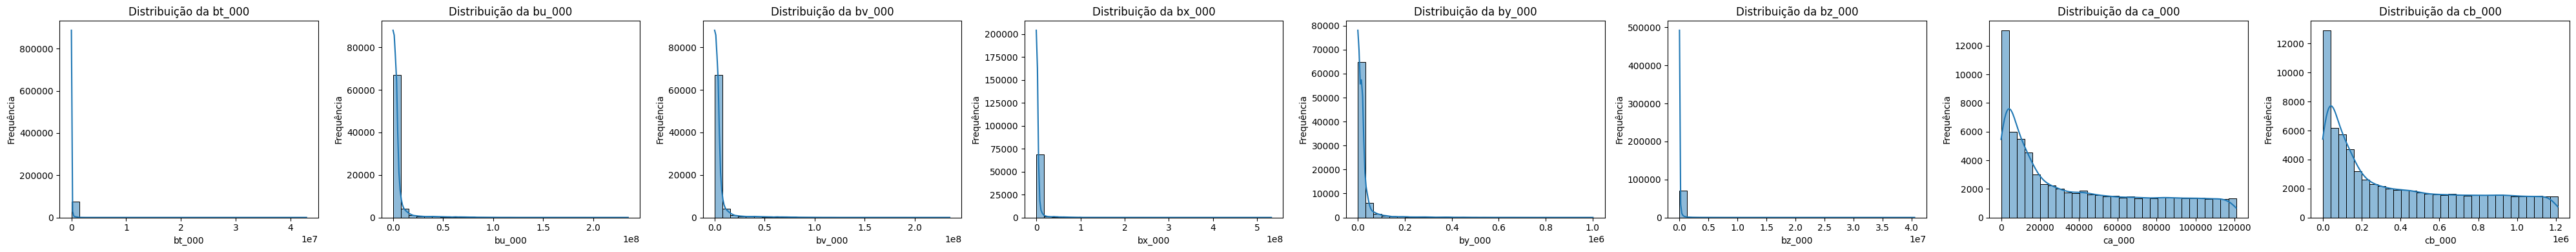

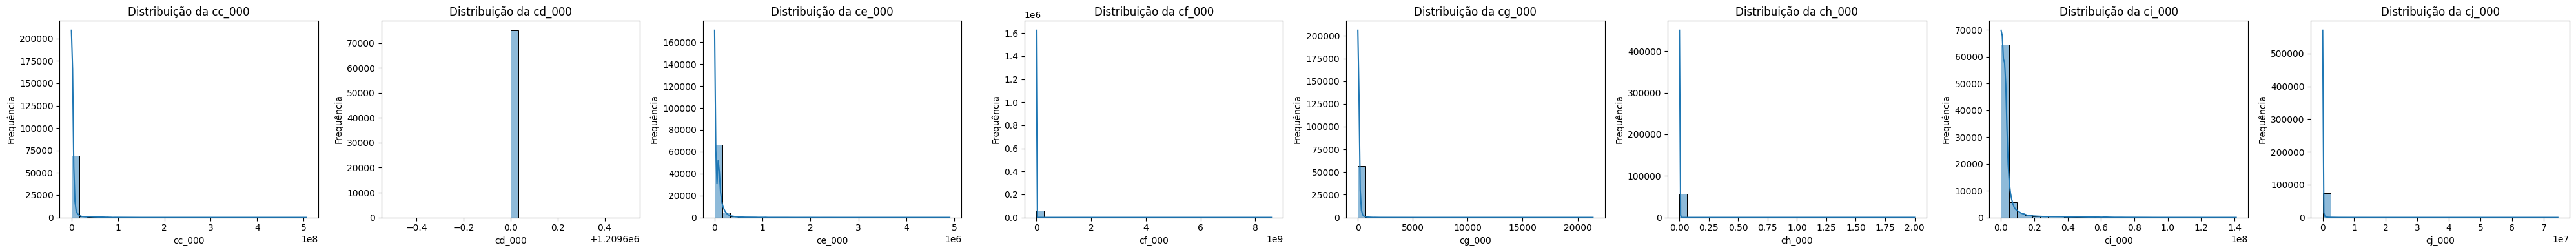

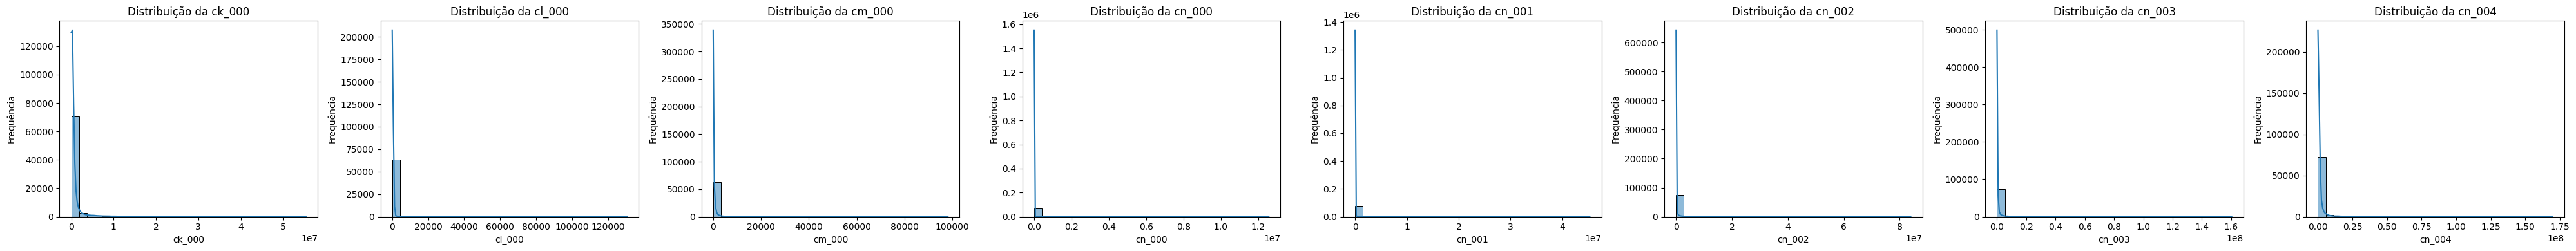

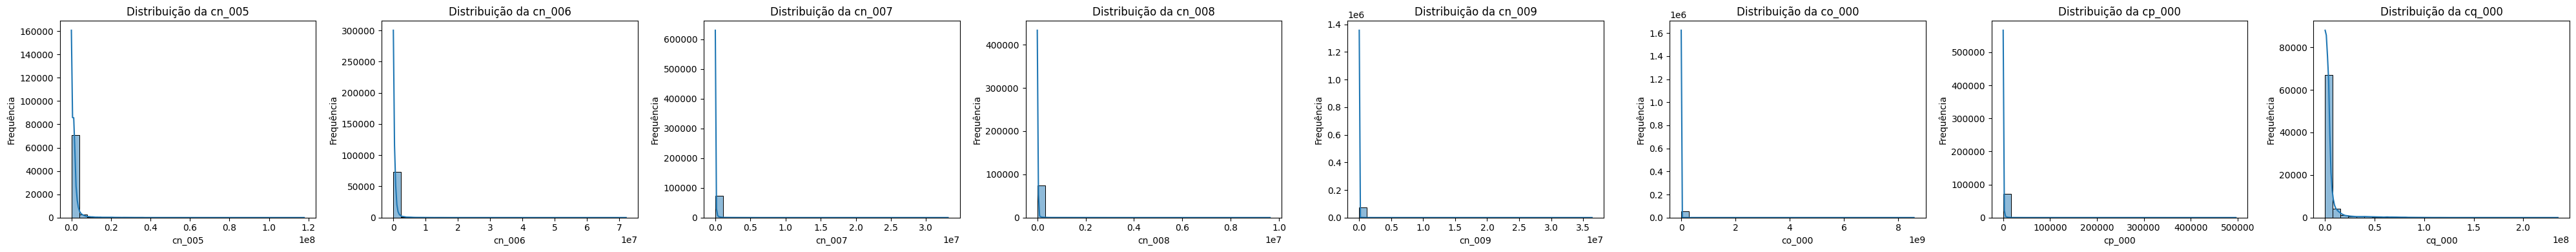

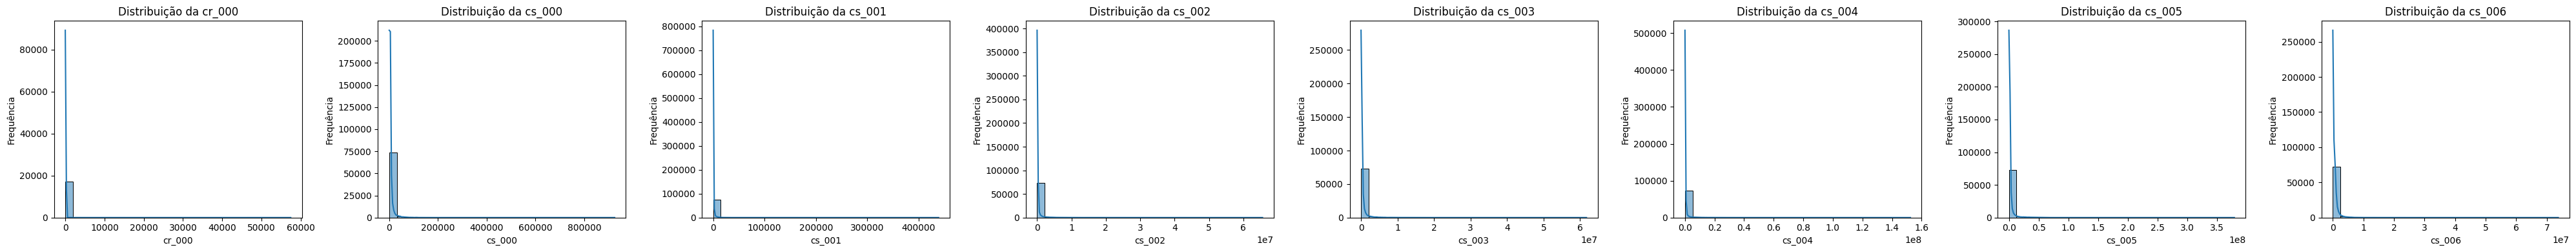

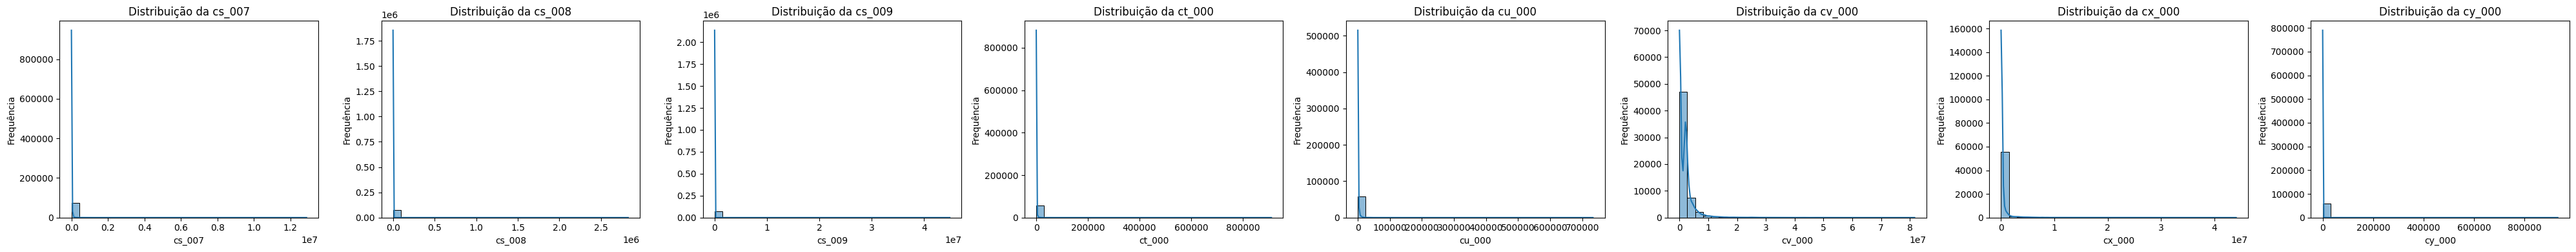

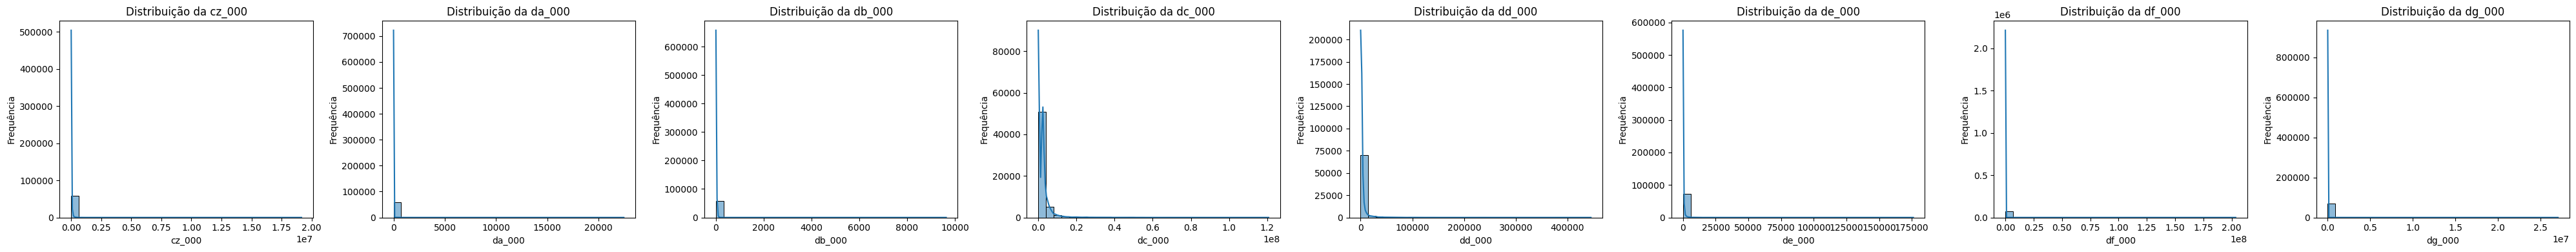

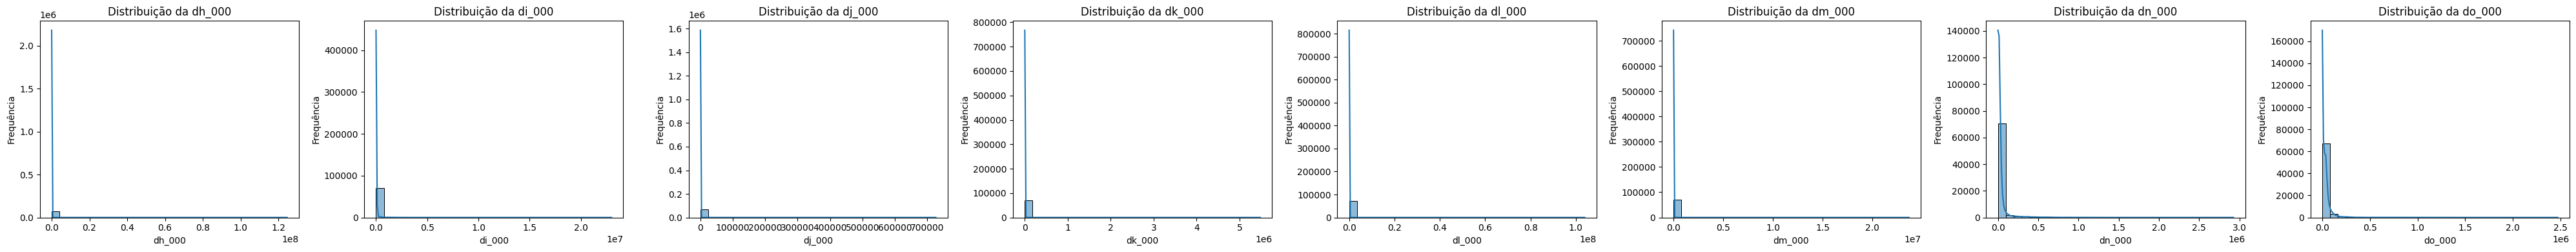

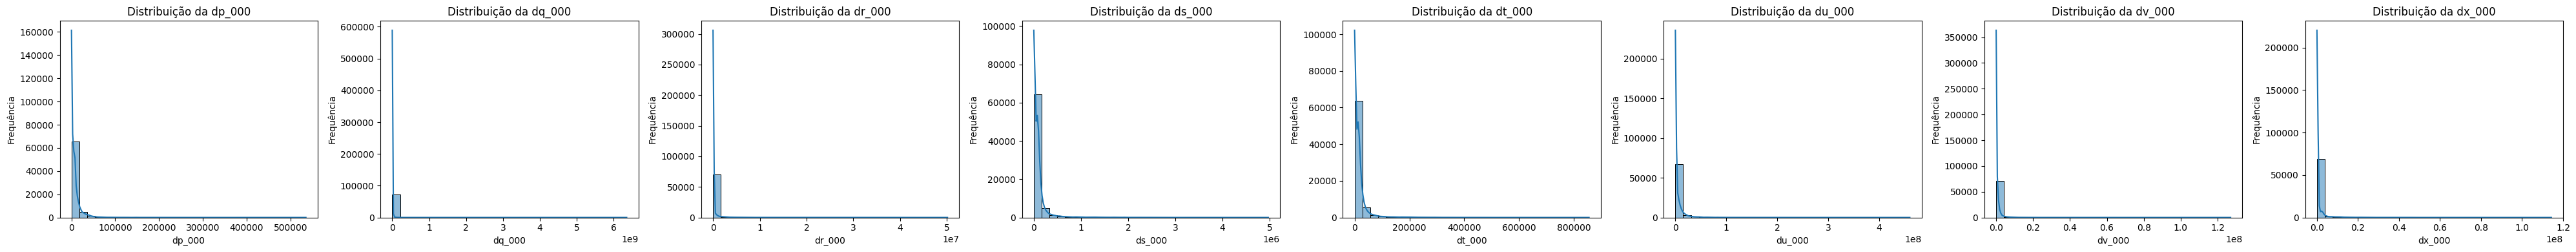

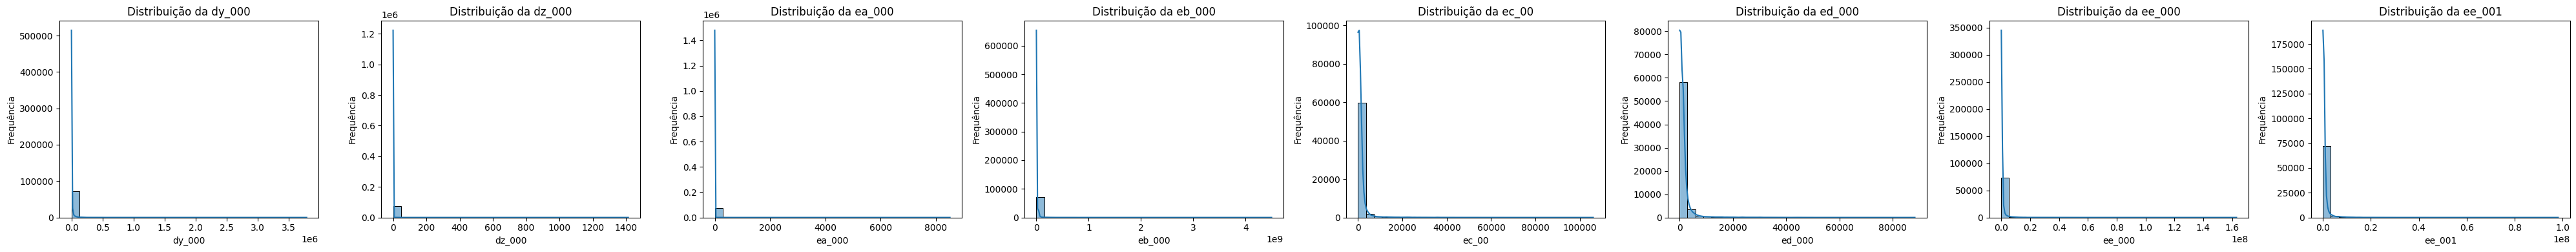

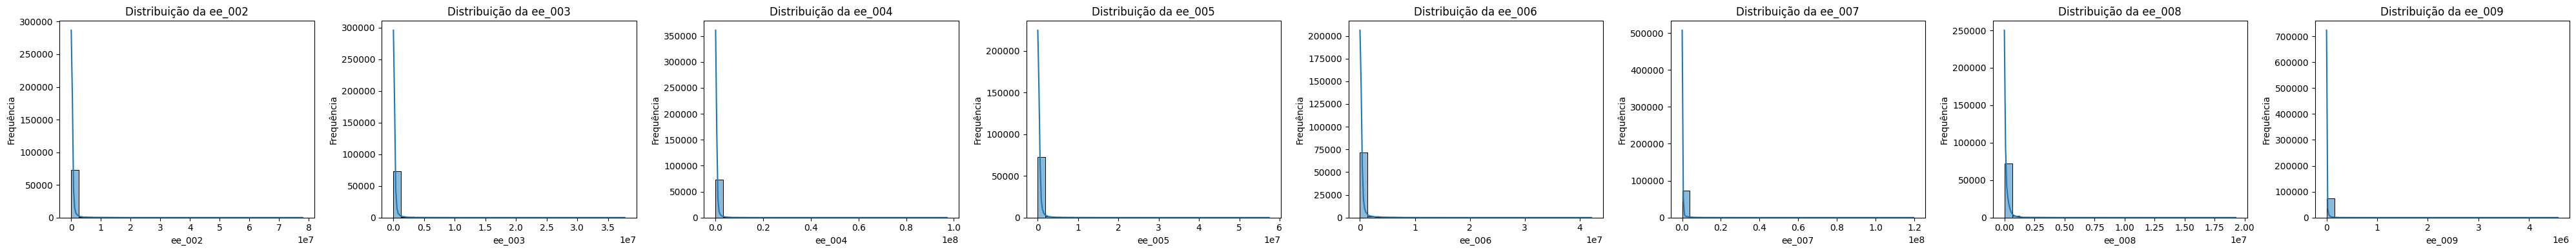

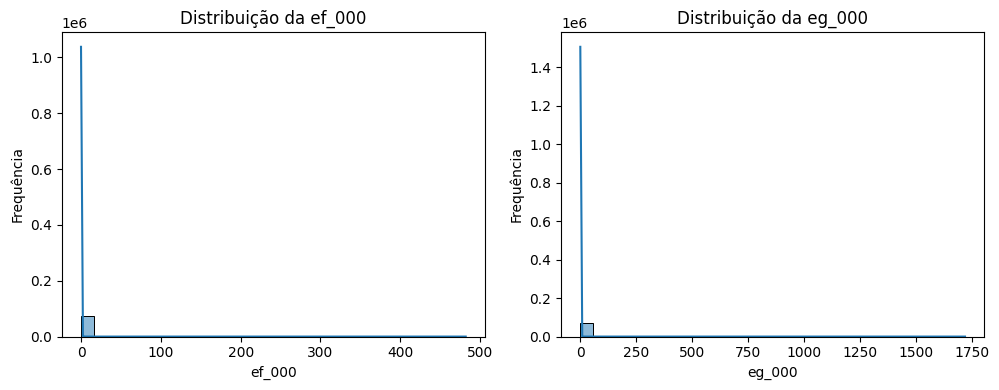

In [ ]:
# Obter todas as features numéricas
numeric_features = df_combined.select_dtypes(include=[np.number]).columns

# Definir o tamanho do lote
batch_size = 8

# Número de batches necessários
num_batches = math.ceil(len(numeric_features) / batch_size)

for batch in range(num_batches):
    # Obter o lote atual de features
    start = batch * batch_size
    end = start + batch_size
    features_batch = numeric_features[start:end]

    # Definir o número de colunas e linhas para o lote atual
    num_cols = 8
    num_rows = math.ceil(len(features_batch) / num_cols)

    # Criar uma grade de subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()

    # Gerar os histogramas para o lote atual
    for i, feature in enumerate(features_batch):
        sns.histplot(df_combined[feature], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribuição da {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequência')

    # Remover subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar o layout
    plt.tight_layout()
    plt.show()


**Boxplot para Identificar Outliers**

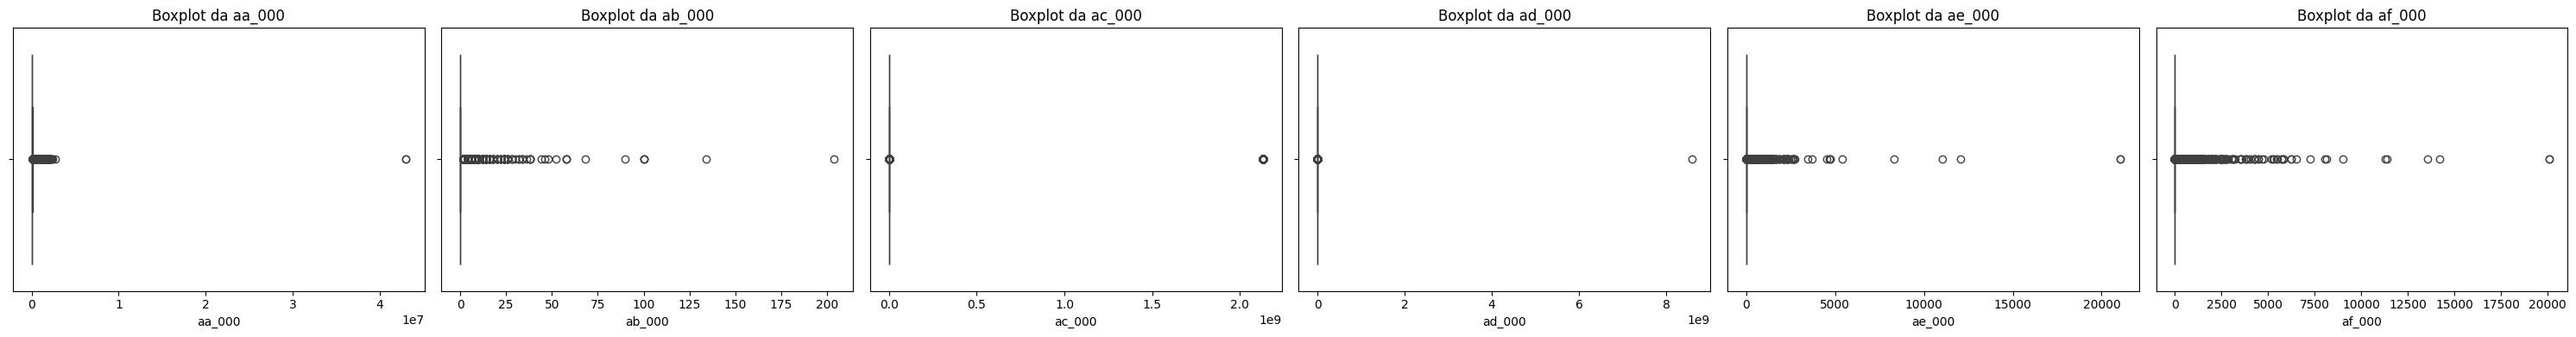

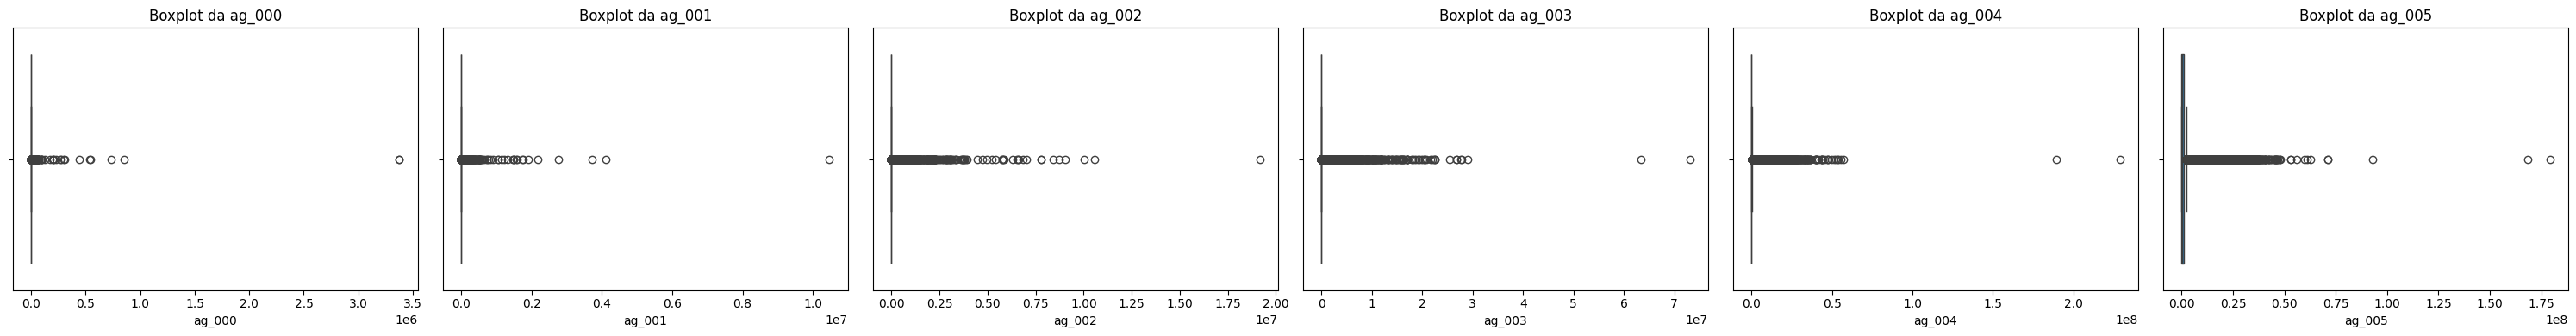

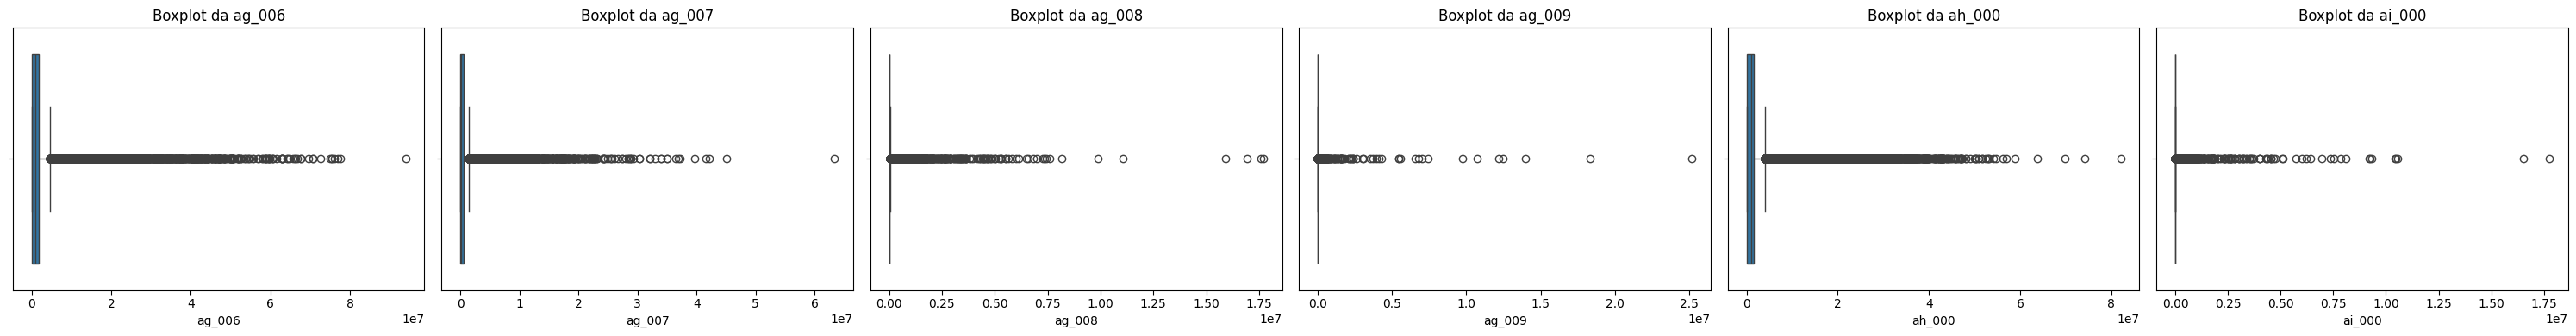

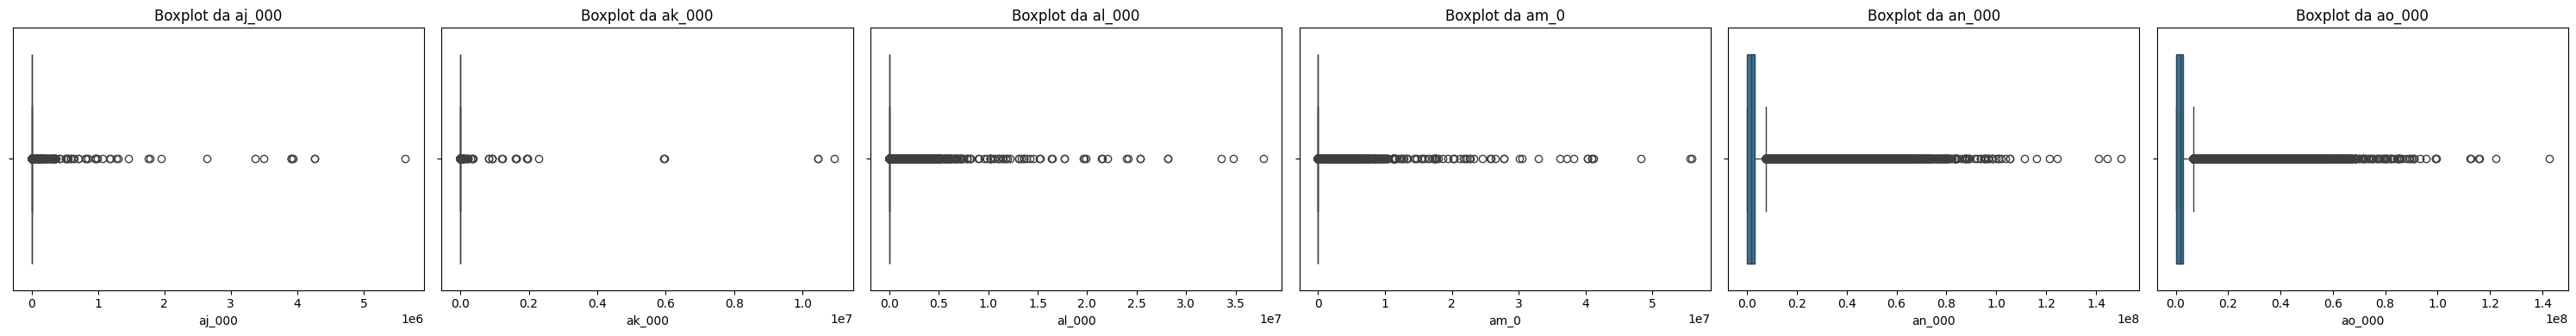

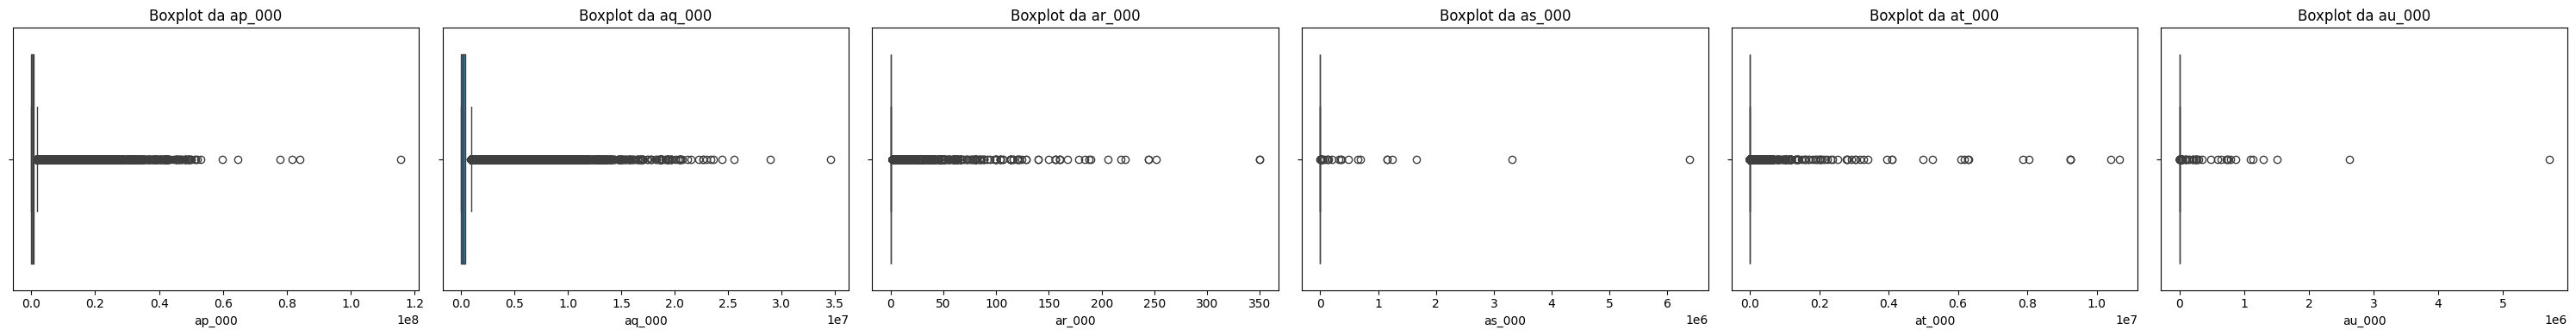

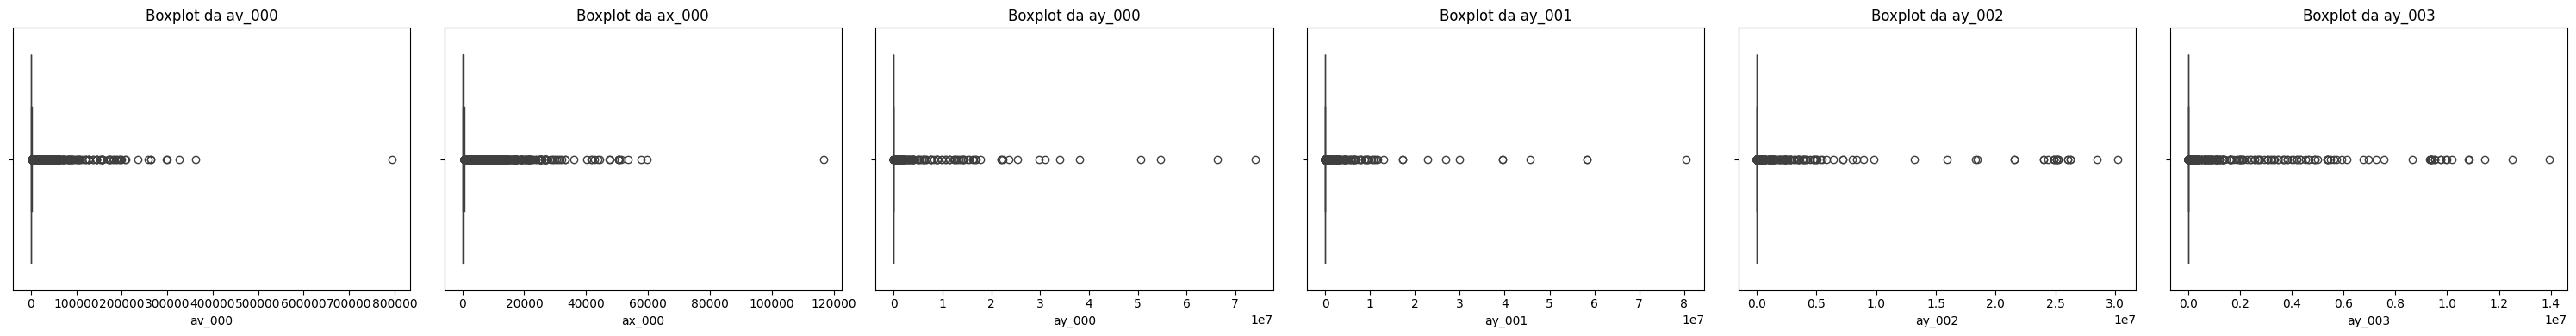

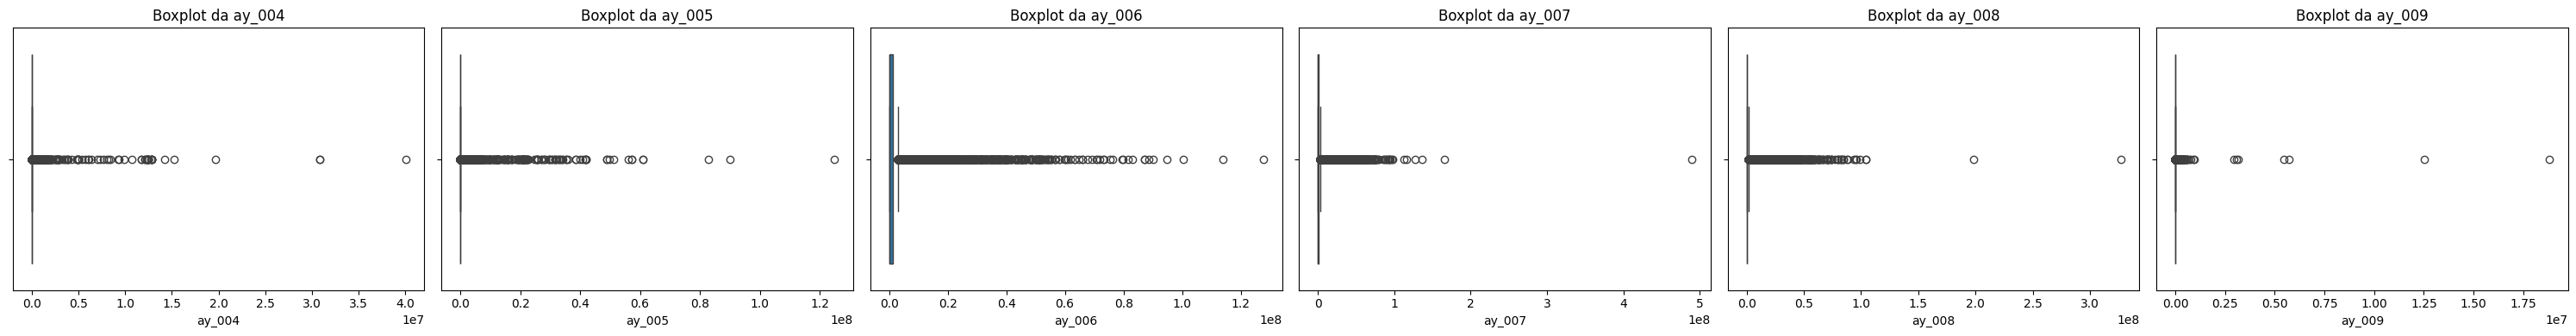

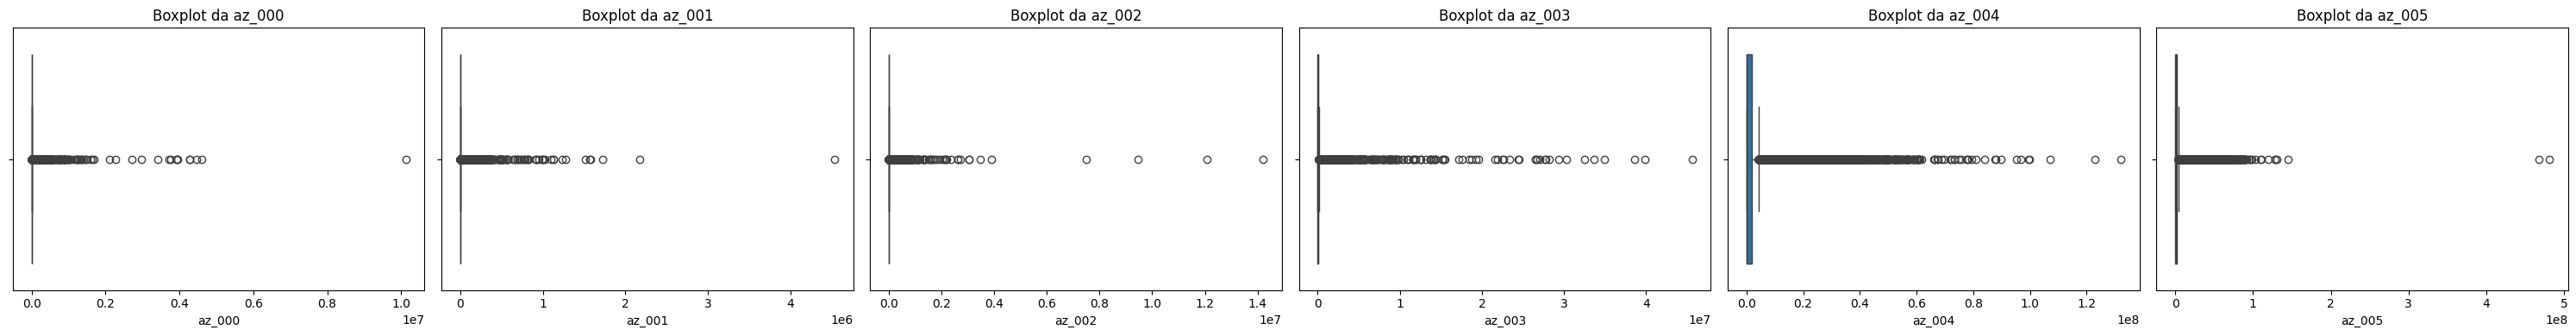

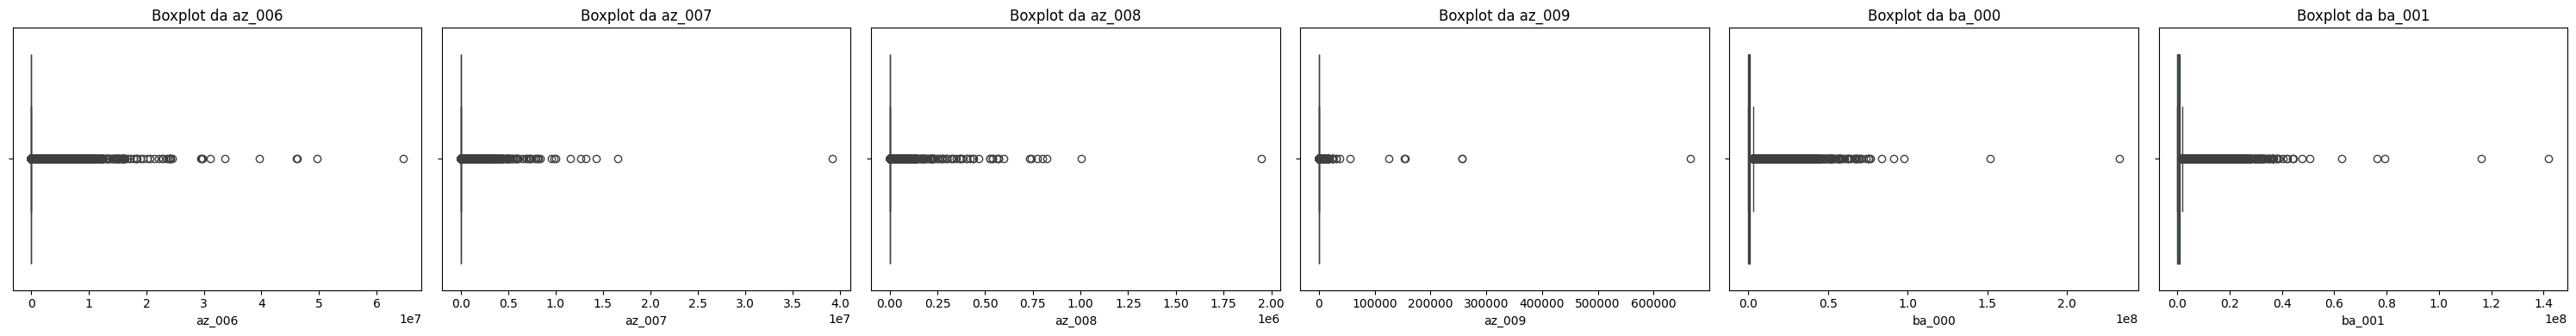

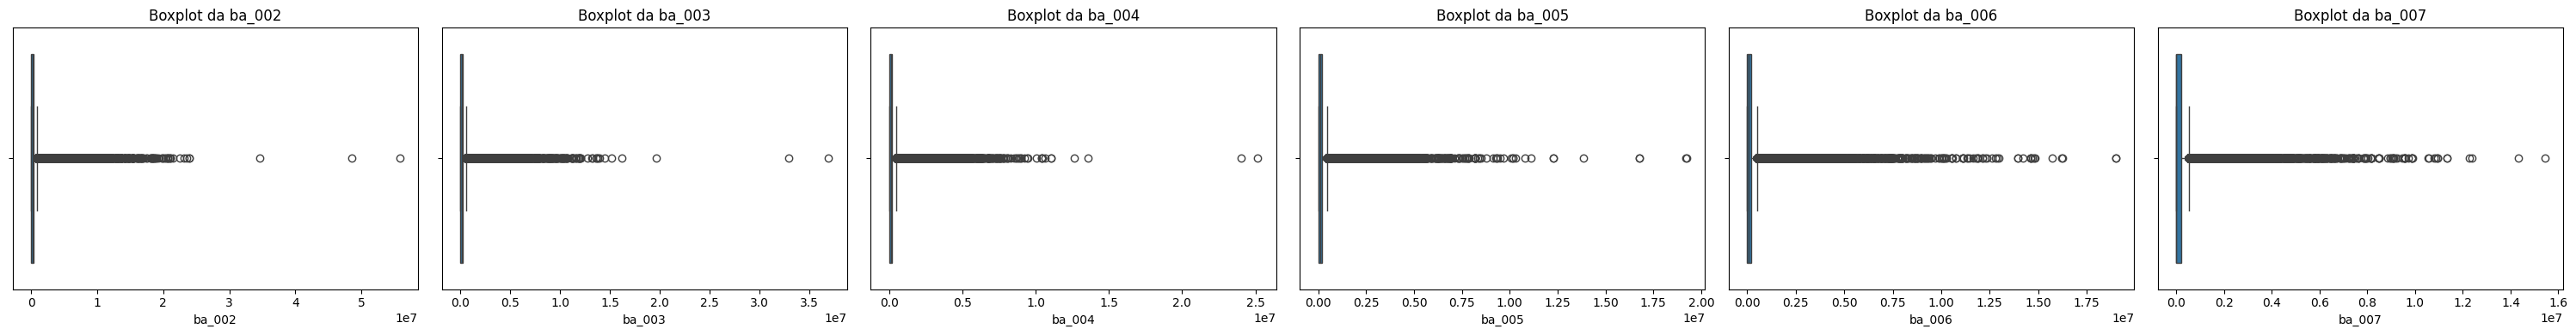

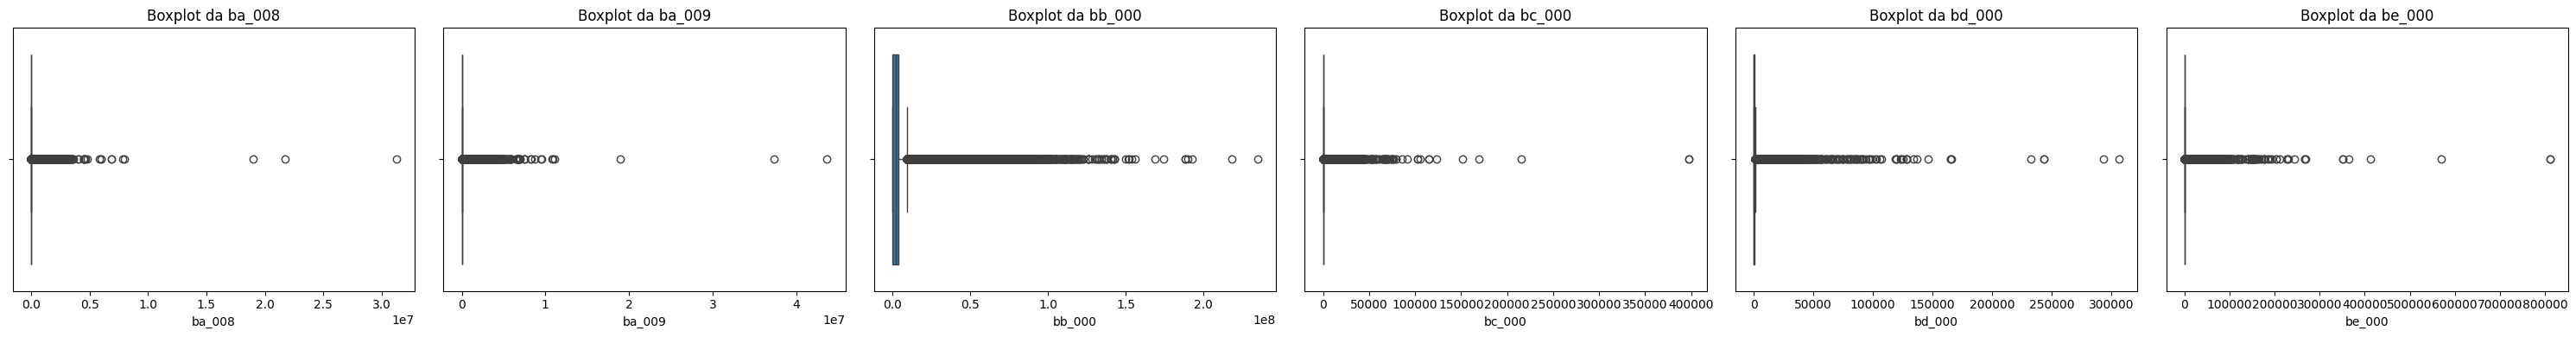

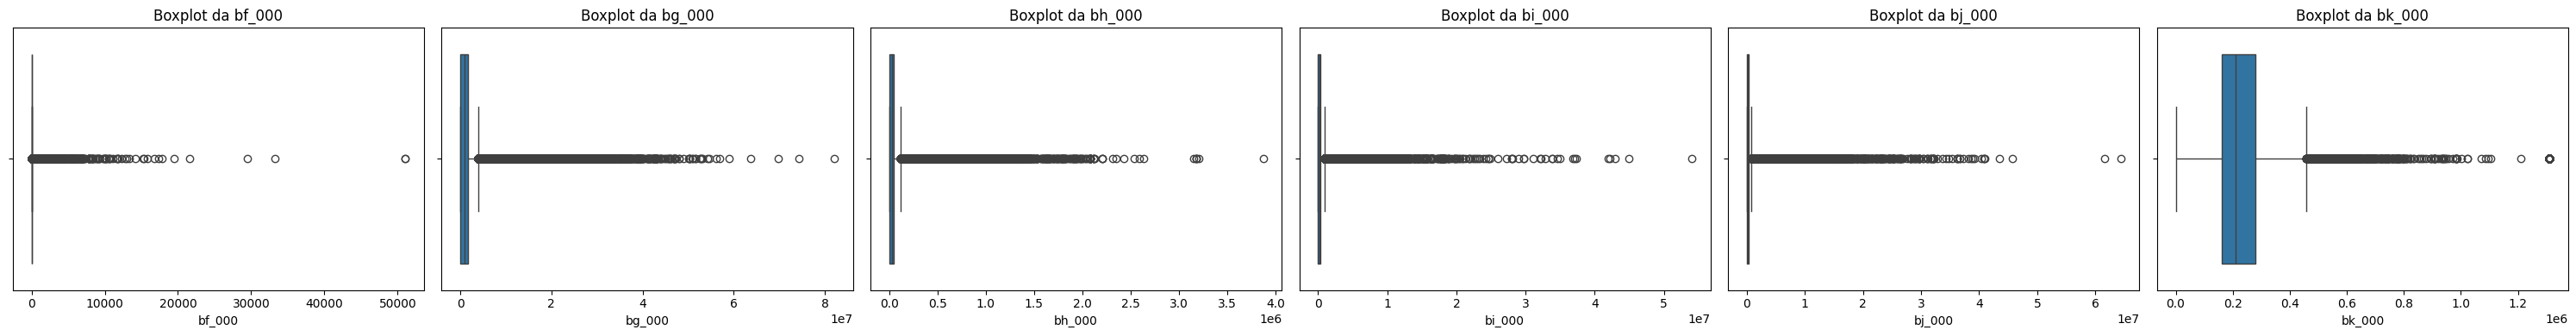

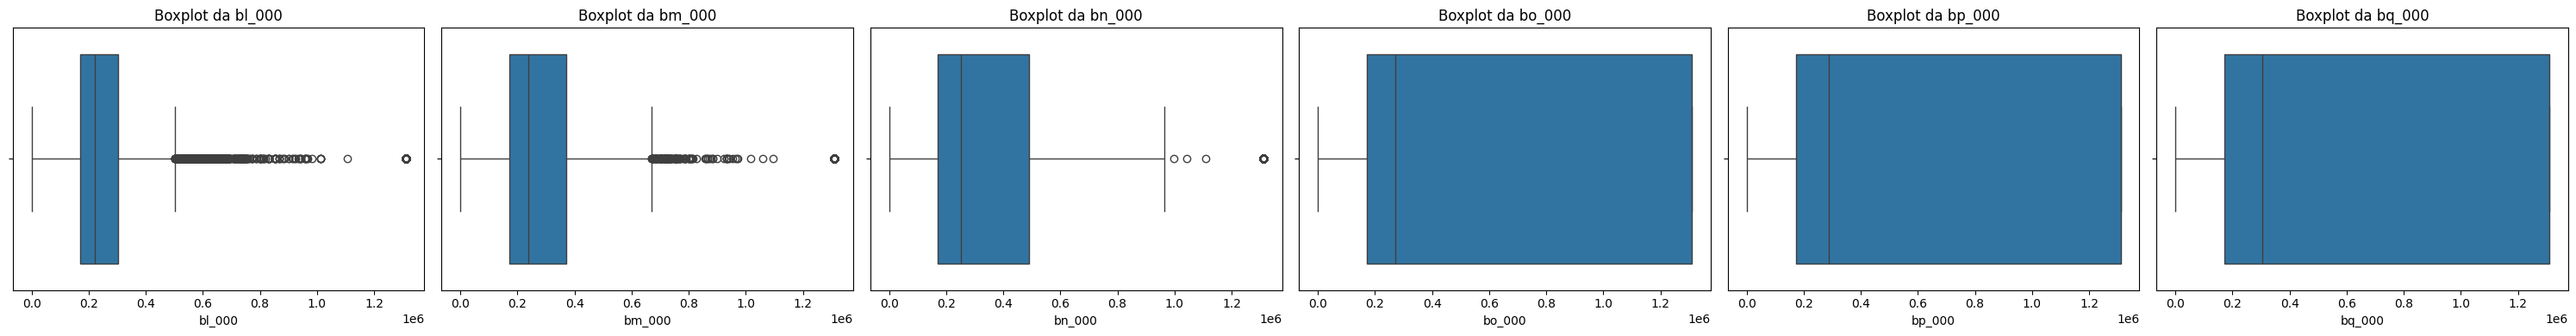

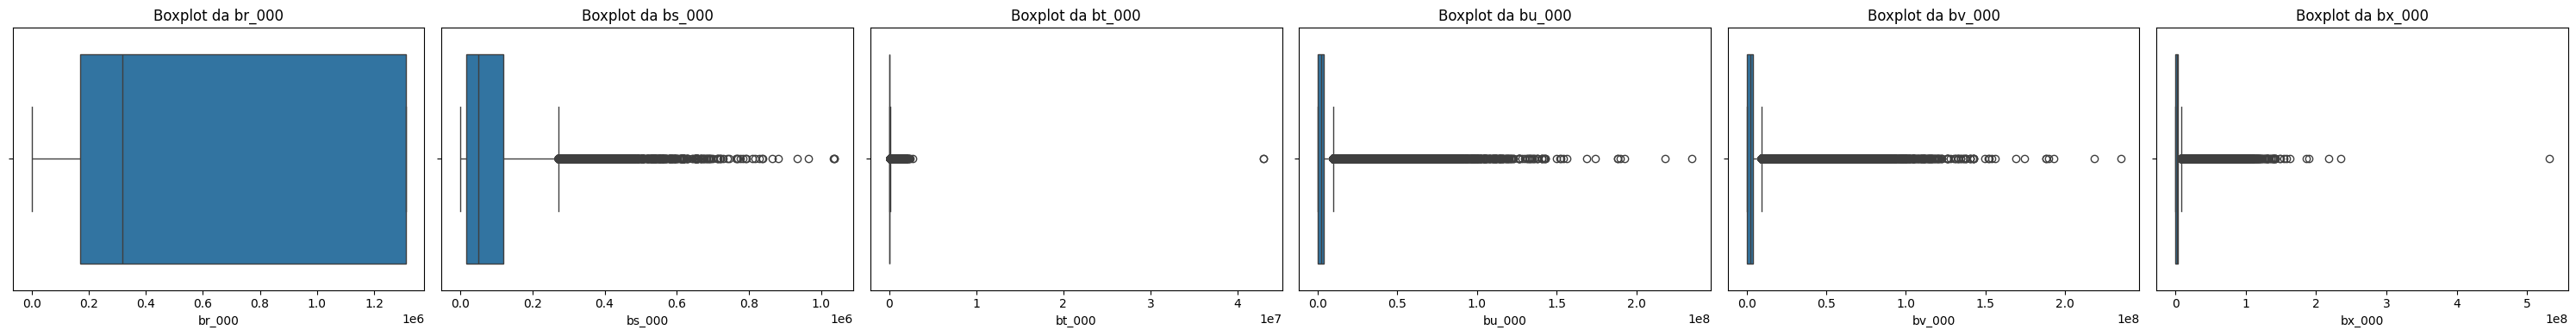

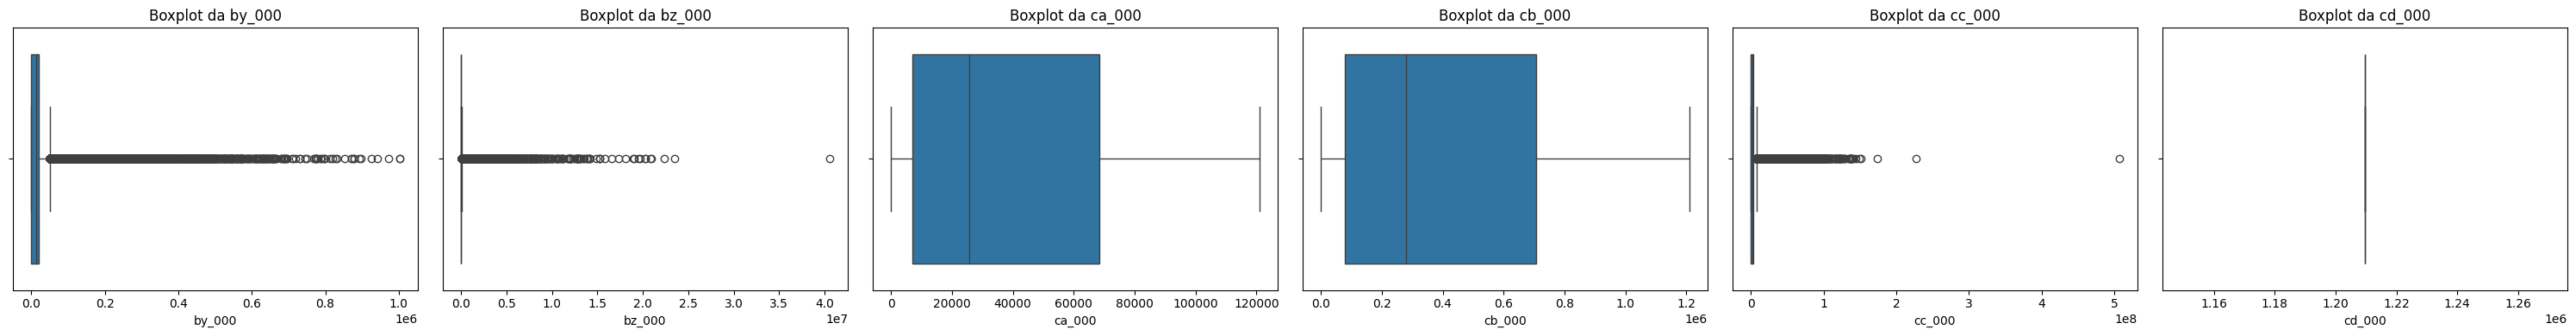

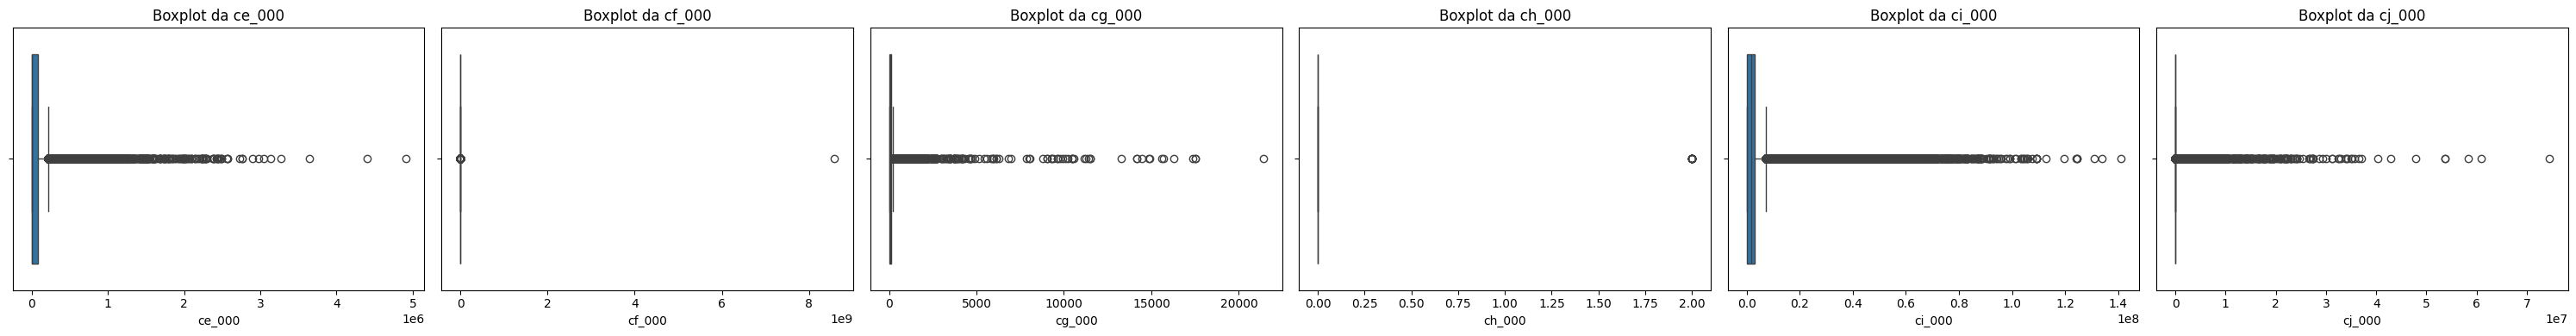

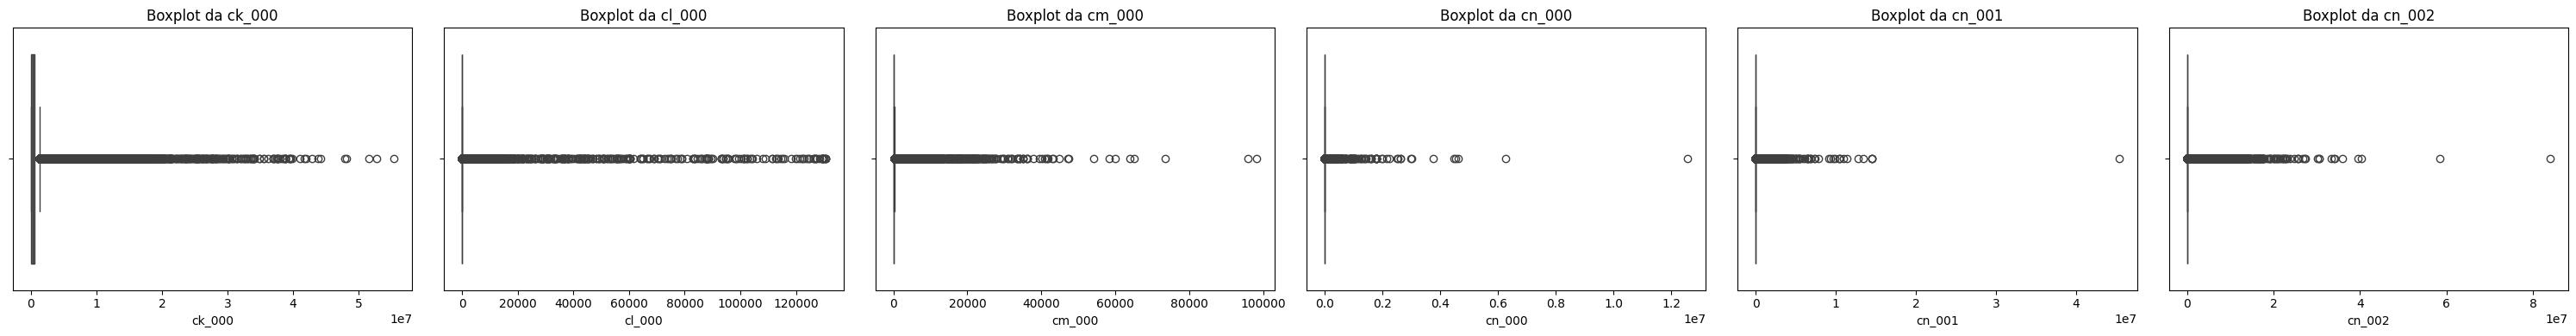

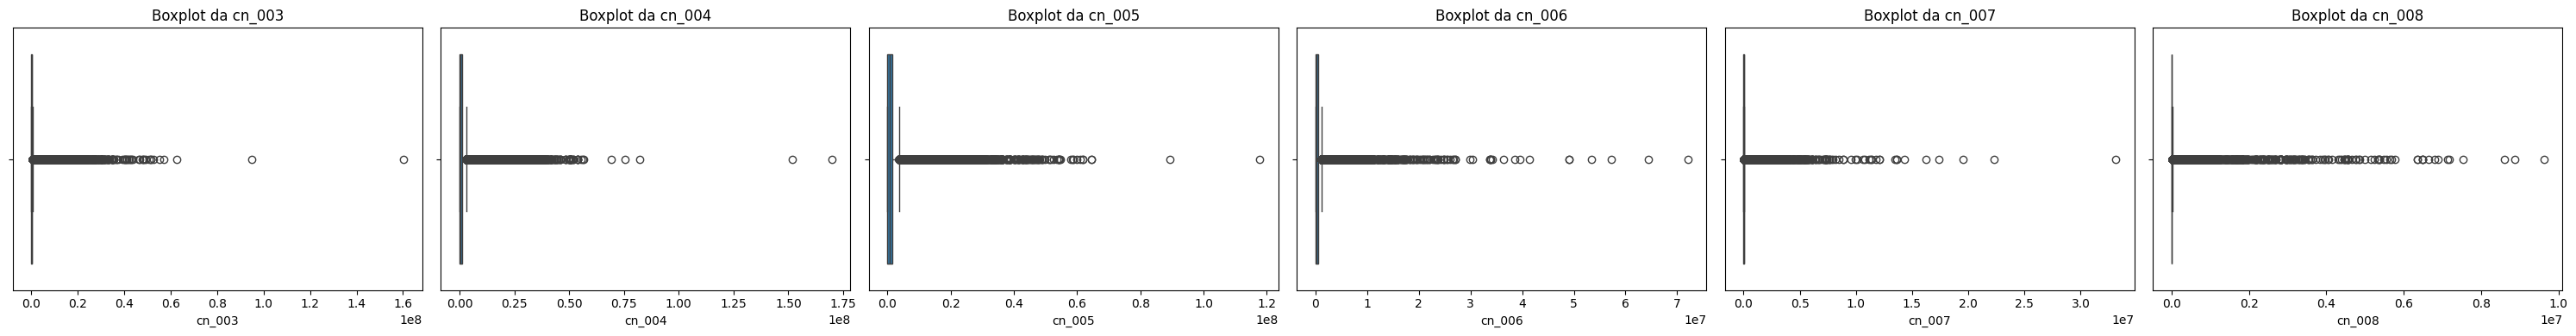

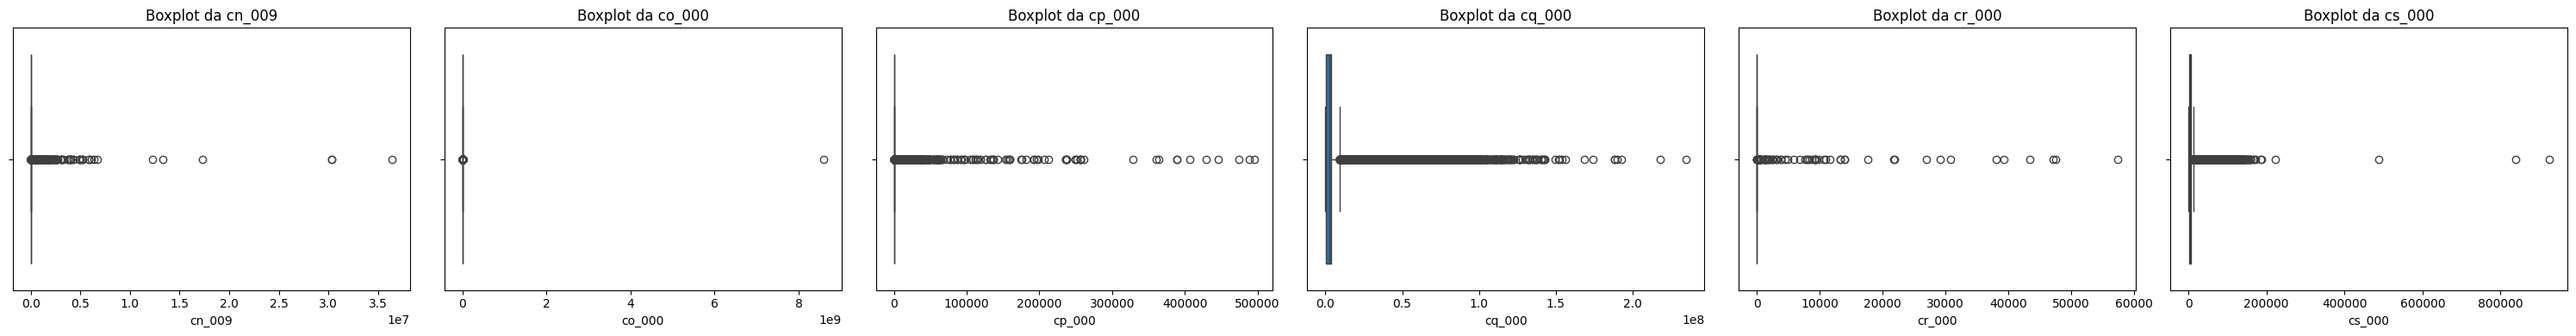

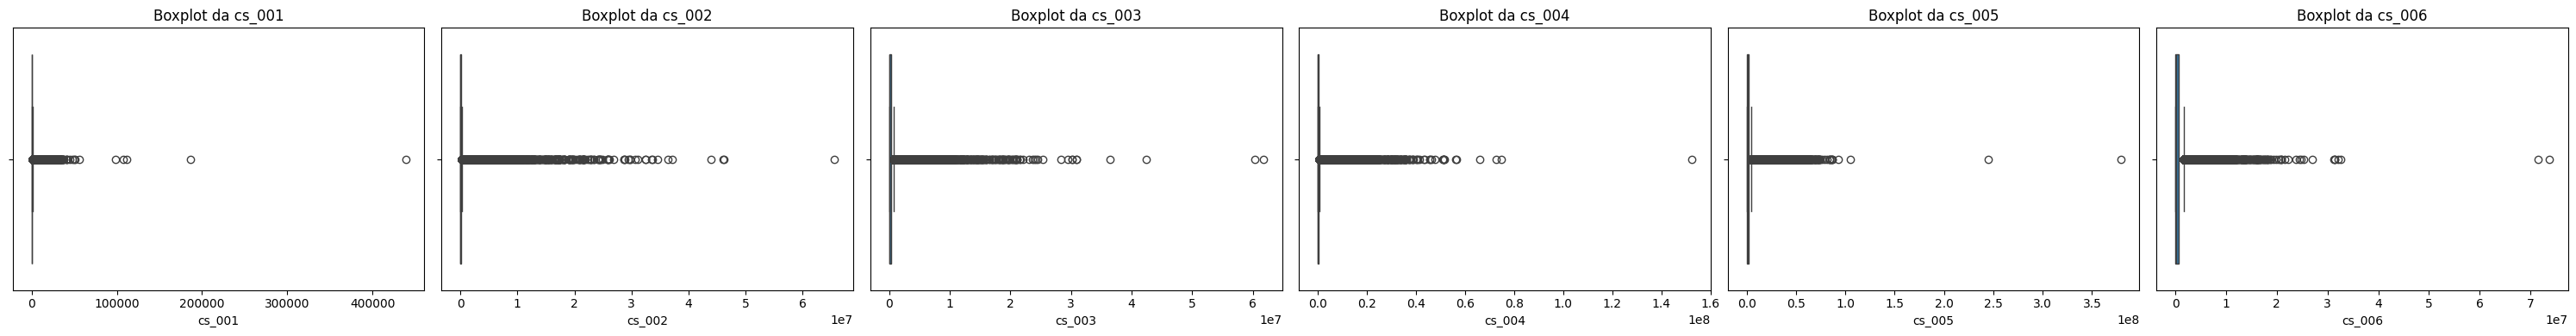

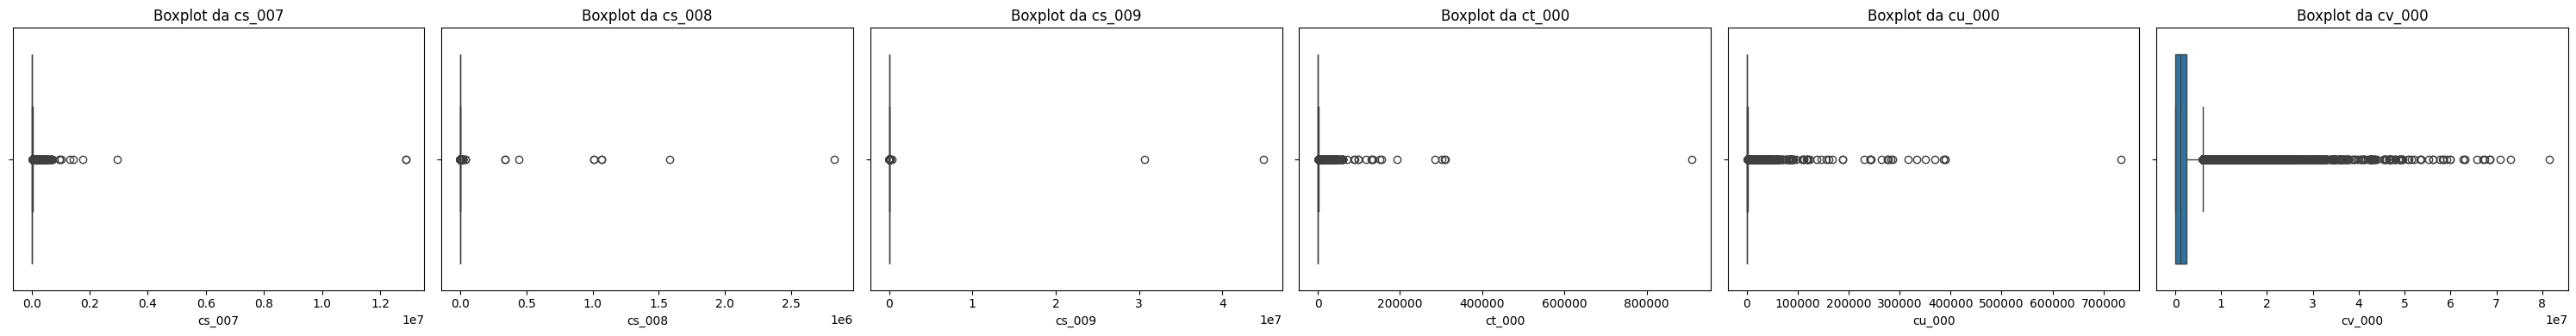

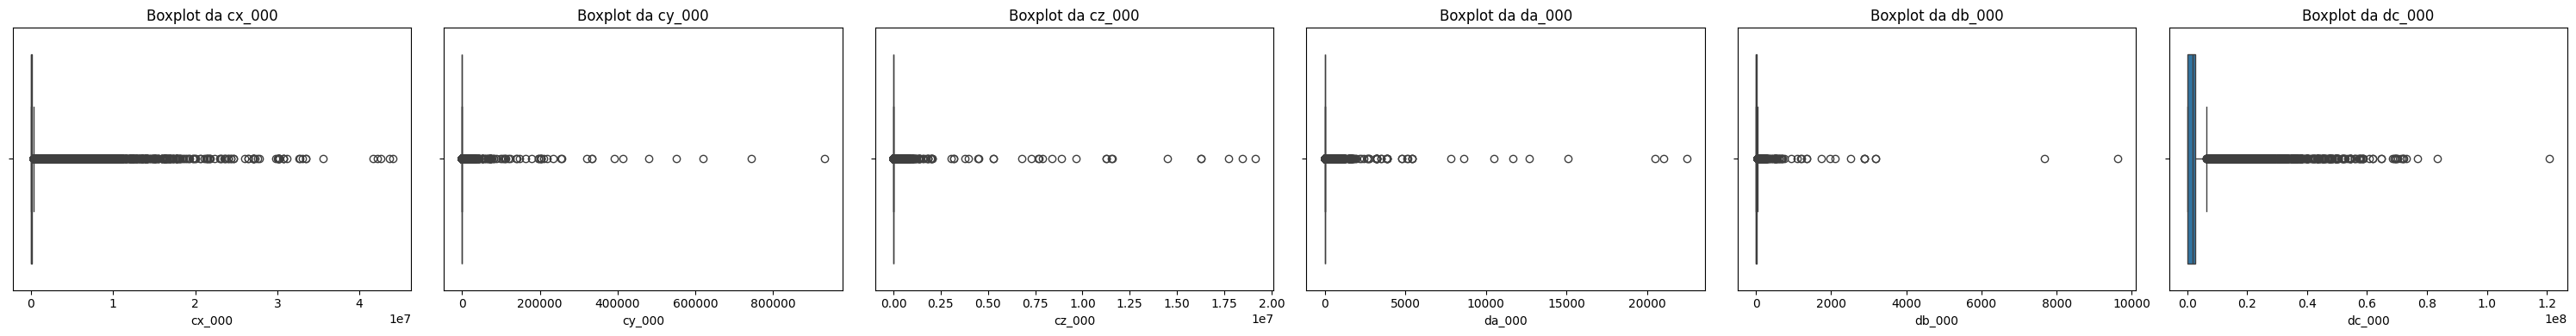

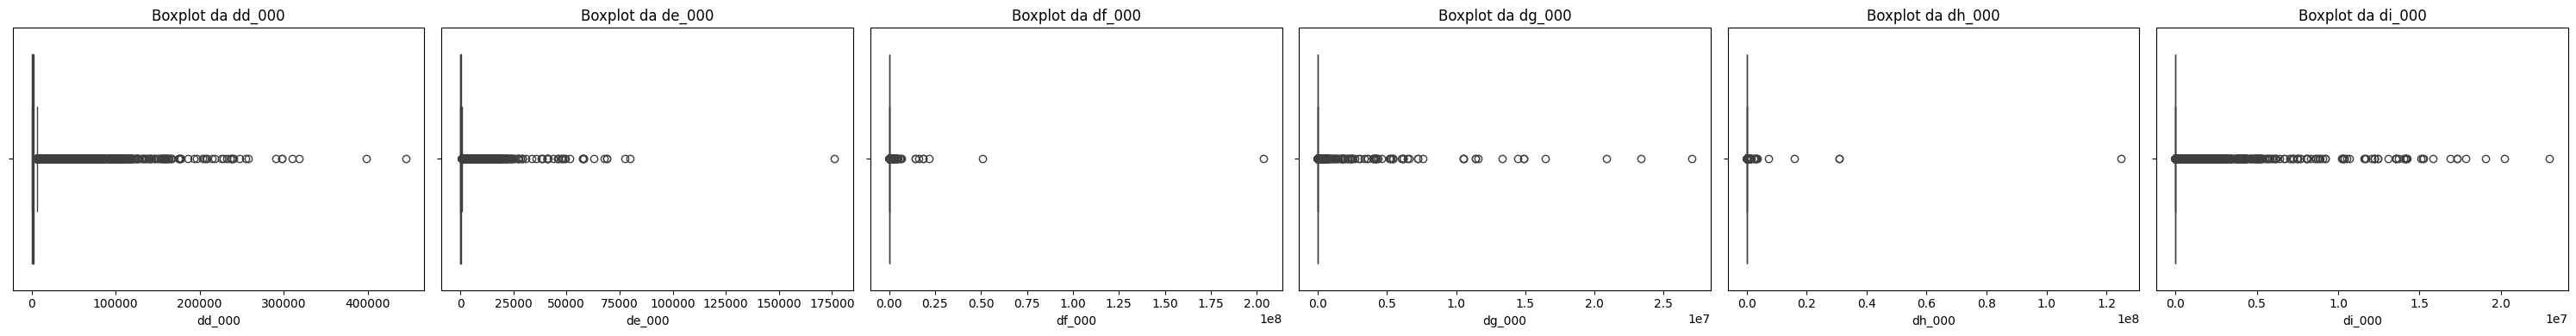

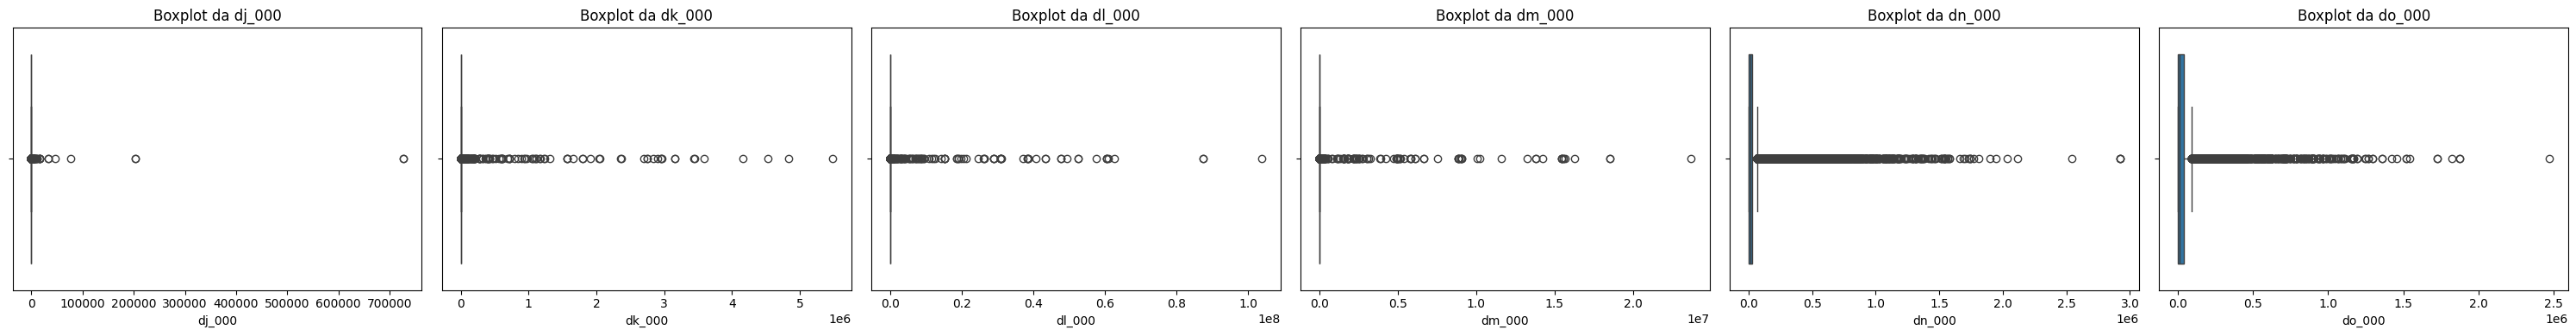

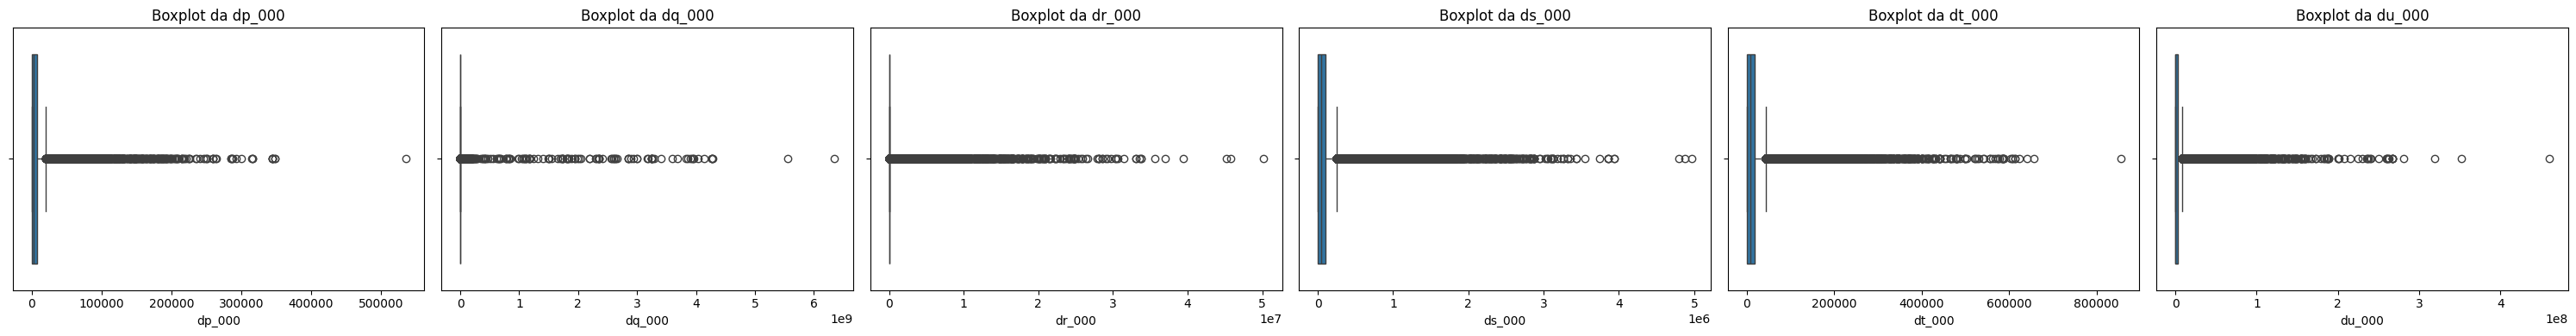

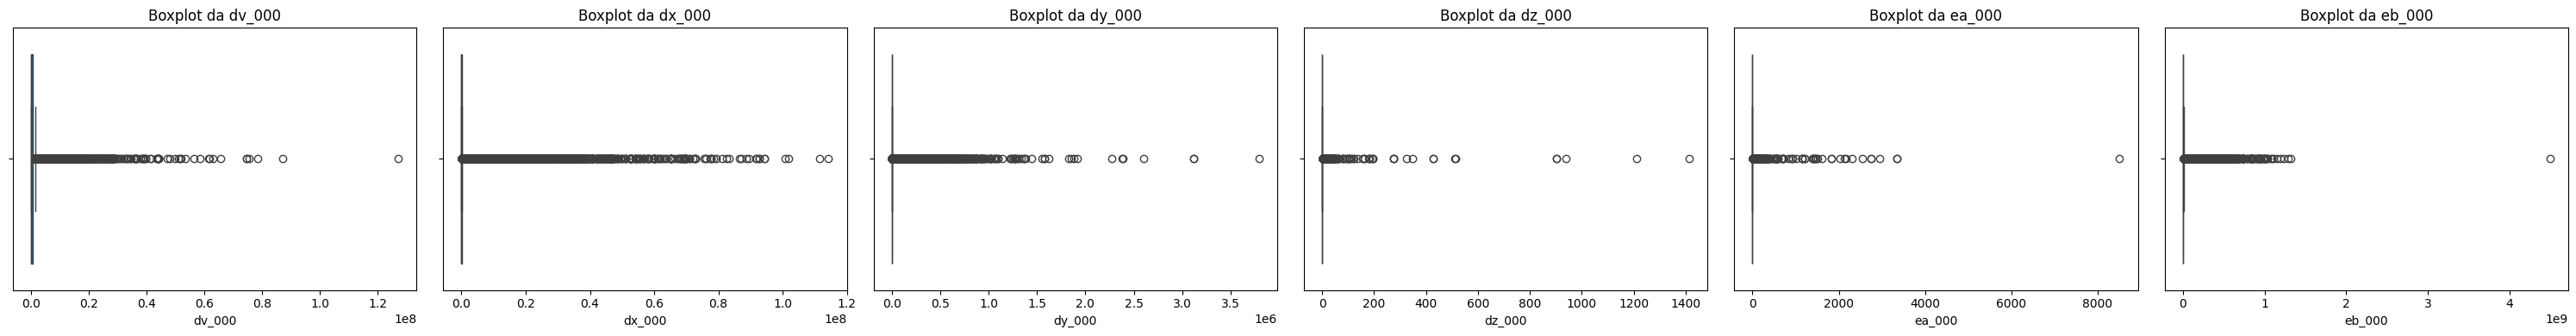

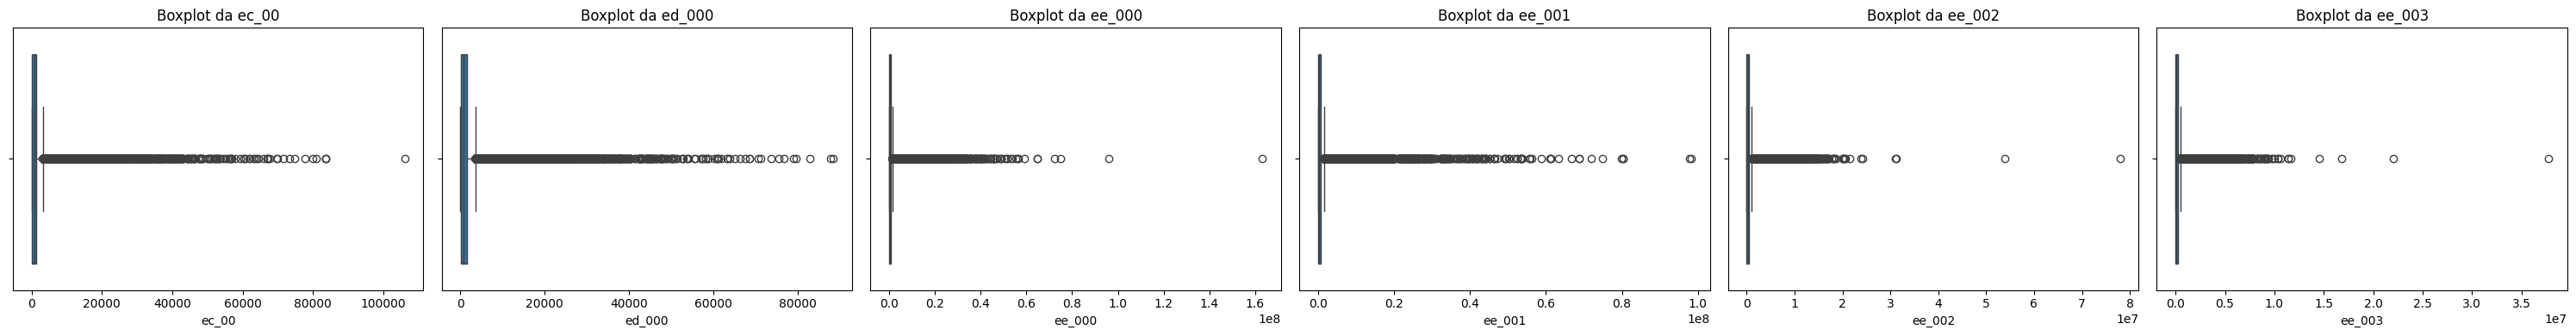

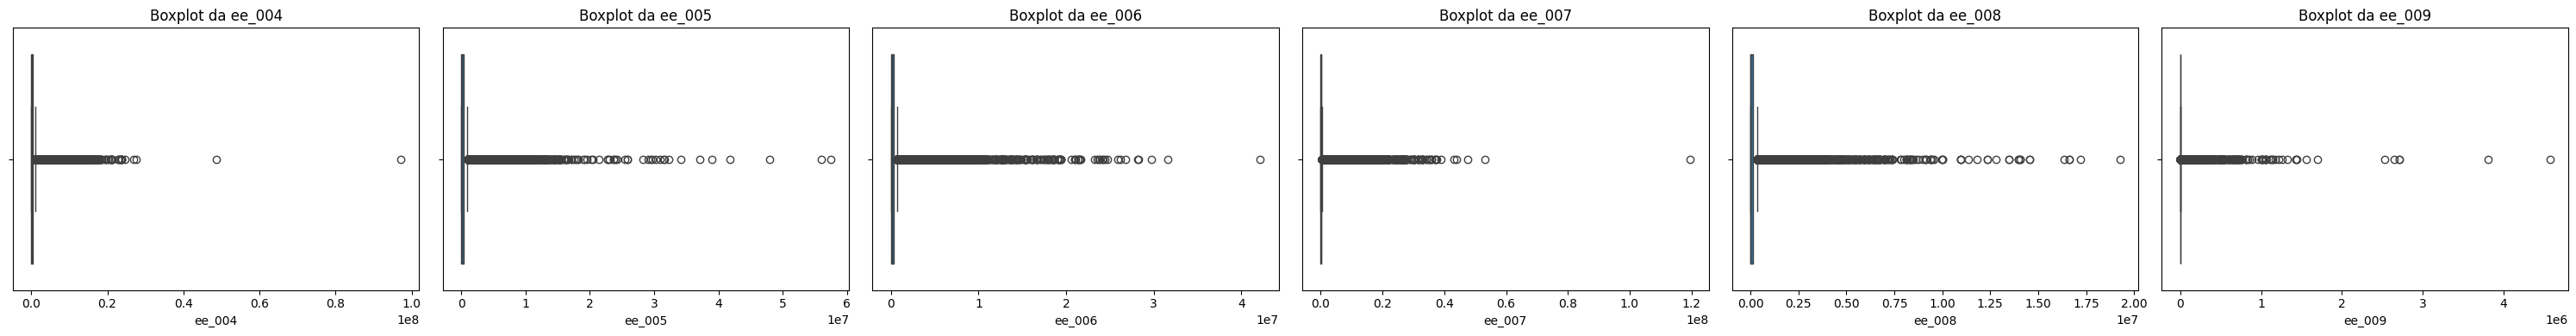

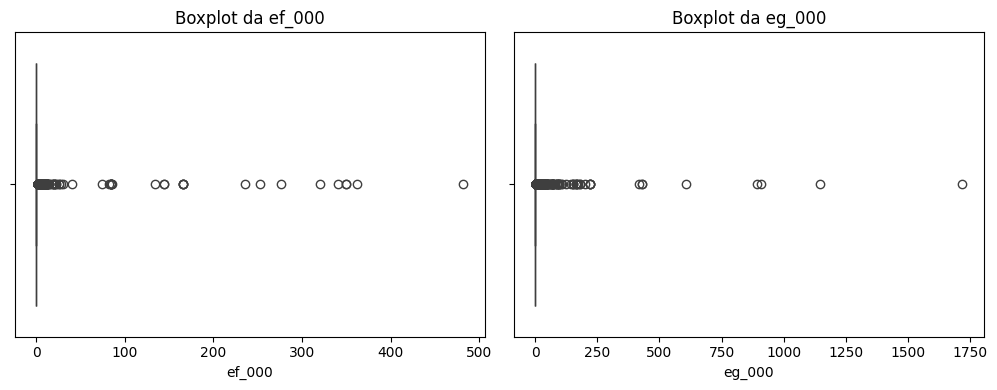

In [ ]:
# Definir o tamanho do lote
batch_size = 6

# Número de batches necessários
num_batches = math.ceil(len(numeric_features) / batch_size)

for batch in range(num_batches):
    # Obter o lote atual de features
    start = batch * batch_size
    end = start + batch_size
    features_batch = numeric_features[start:end]

    # Definir o número de colunas e linhas para o lote atual
    num_cols = 6
    num_rows = math.ceil(len(features_batch) / num_cols)

    # Criar uma grade de subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()

    # Gerar os boxplots para o lote atual
    for i, feature in enumerate(features_batch):
        sns.boxplot(x=df_combined[feature], ax=axes[i])
        axes[i].set_title(f'Boxplot da {feature}')
        axes[i].set_xlabel(feature)

    # Remover subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar o layout
    plt.tight_layout()
    plt.show()


**Heatmap de Correlação**

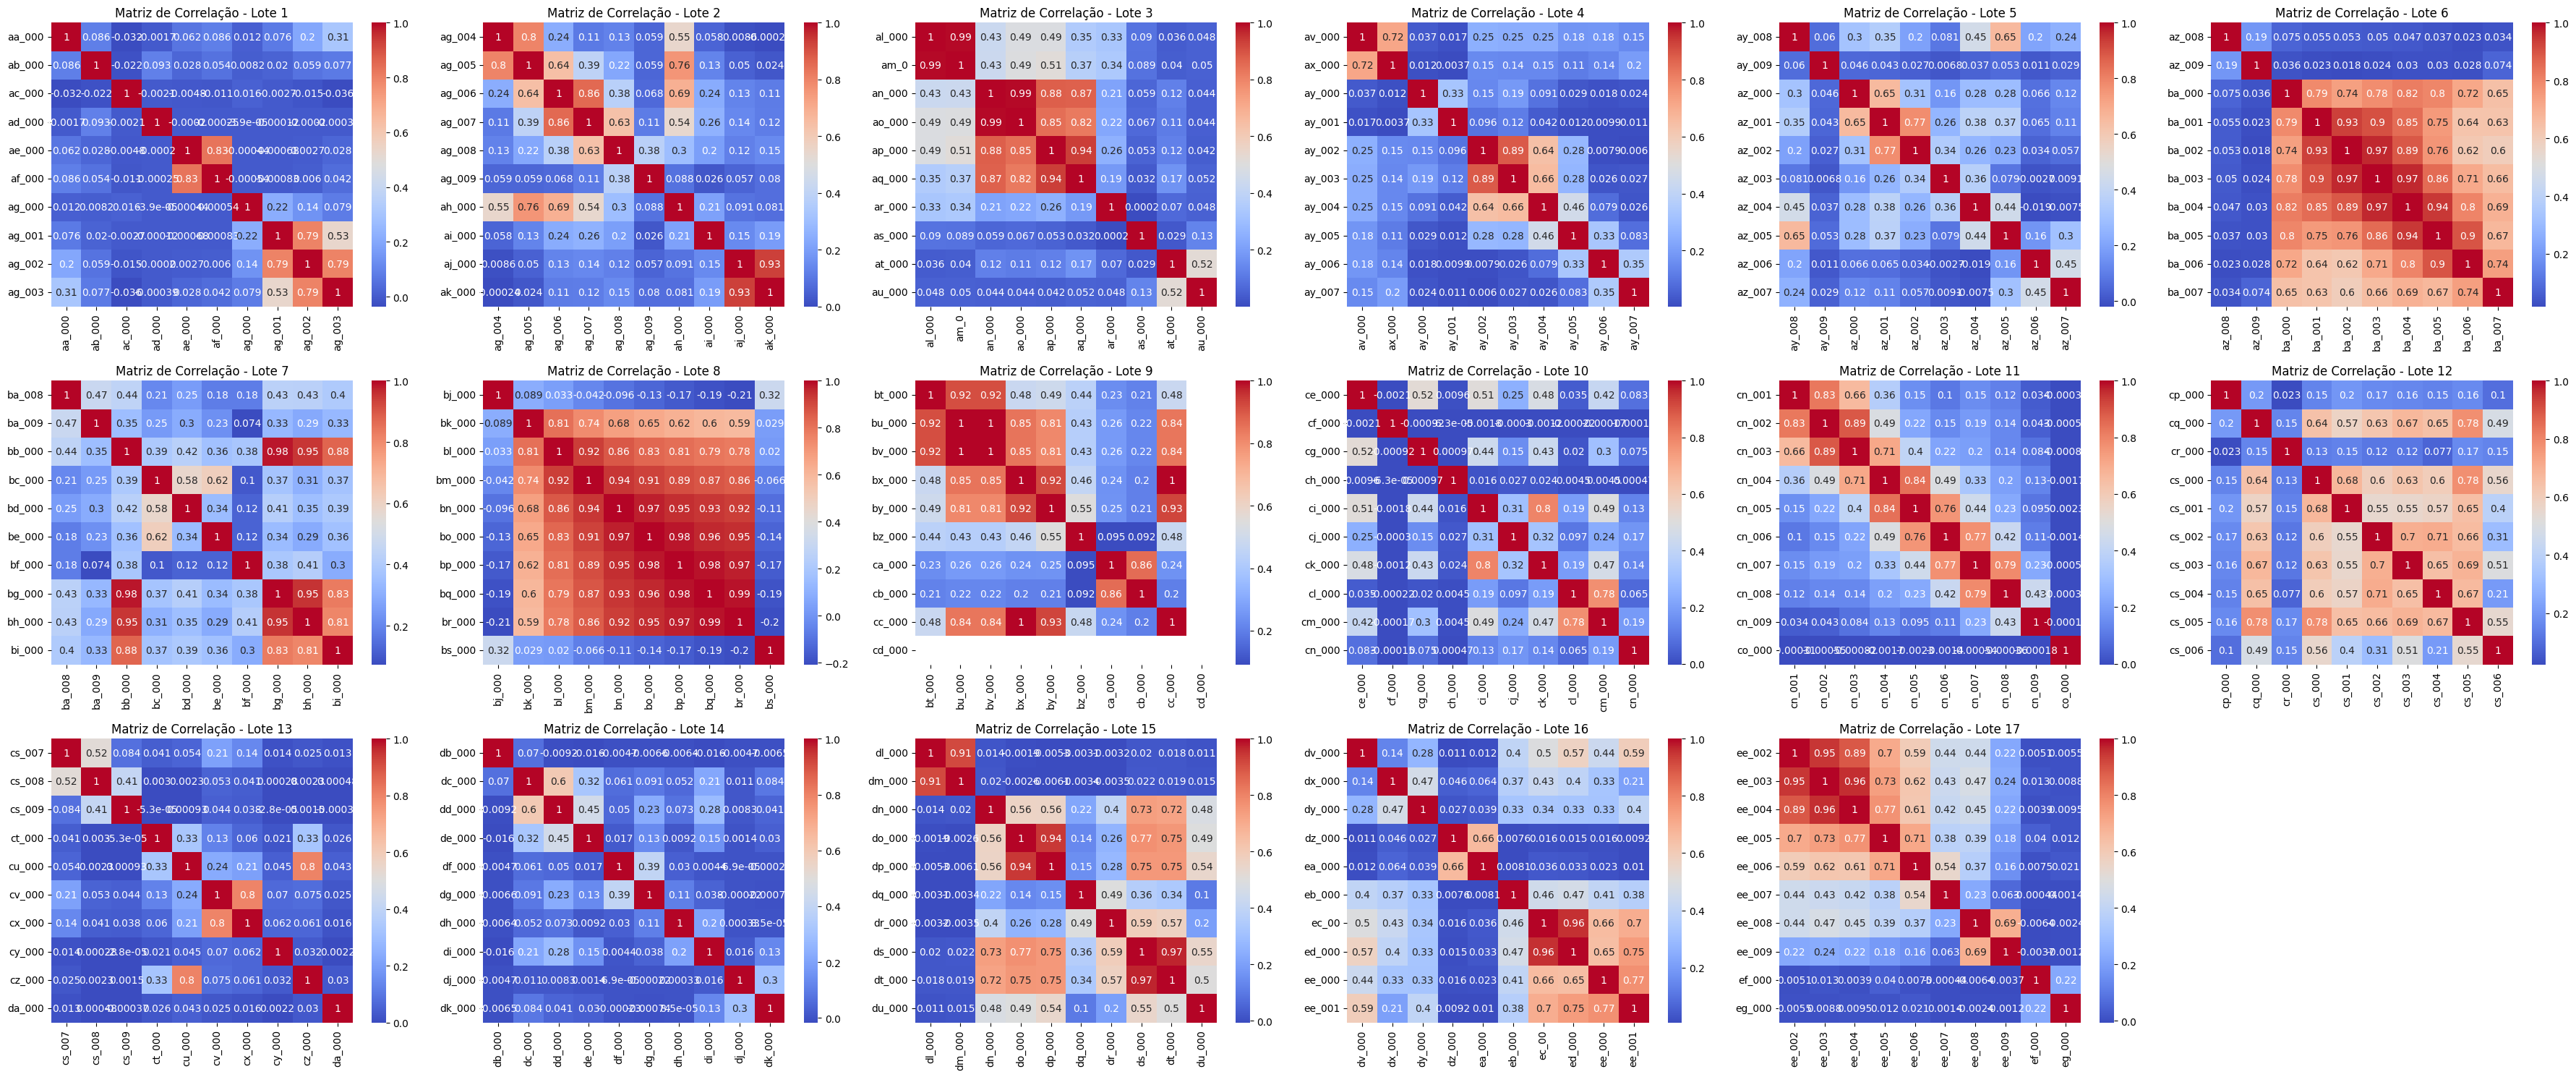

In [ ]:
# Obter todas as features numéricas
numeric_features = df_combined.select_dtypes(include=[np.number]).columns

# Definir o tamanho do lote
batch_size = 10

# Número de batches necessários
num_batches = math.ceil(len(numeric_features) / batch_size)

# Definir o número de colunas para a grade de gráficos
num_cols = 6
num_rows = math.ceil(num_batches / num_cols)

# Criar uma grade de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))
axes = axes.flatten()

for batch in range(num_batches):
    # Obter o lote atual de features
    start = batch * batch_size
    end = start + batch_size
    features_batch = numeric_features[start:end]

    # Gerar o heatmap de correlação para o lote atual
    correlation_matrix = df_combined[features_batch].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[batch])
    axes[batch].set_title(f'Matriz de Correlação - Lote {batch + 1}')

# Remover subplots vazios
for j in range(batch + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.tight_layout()
plt.show()


**Gráficos de Dispersão para Variáveis Numéricas**

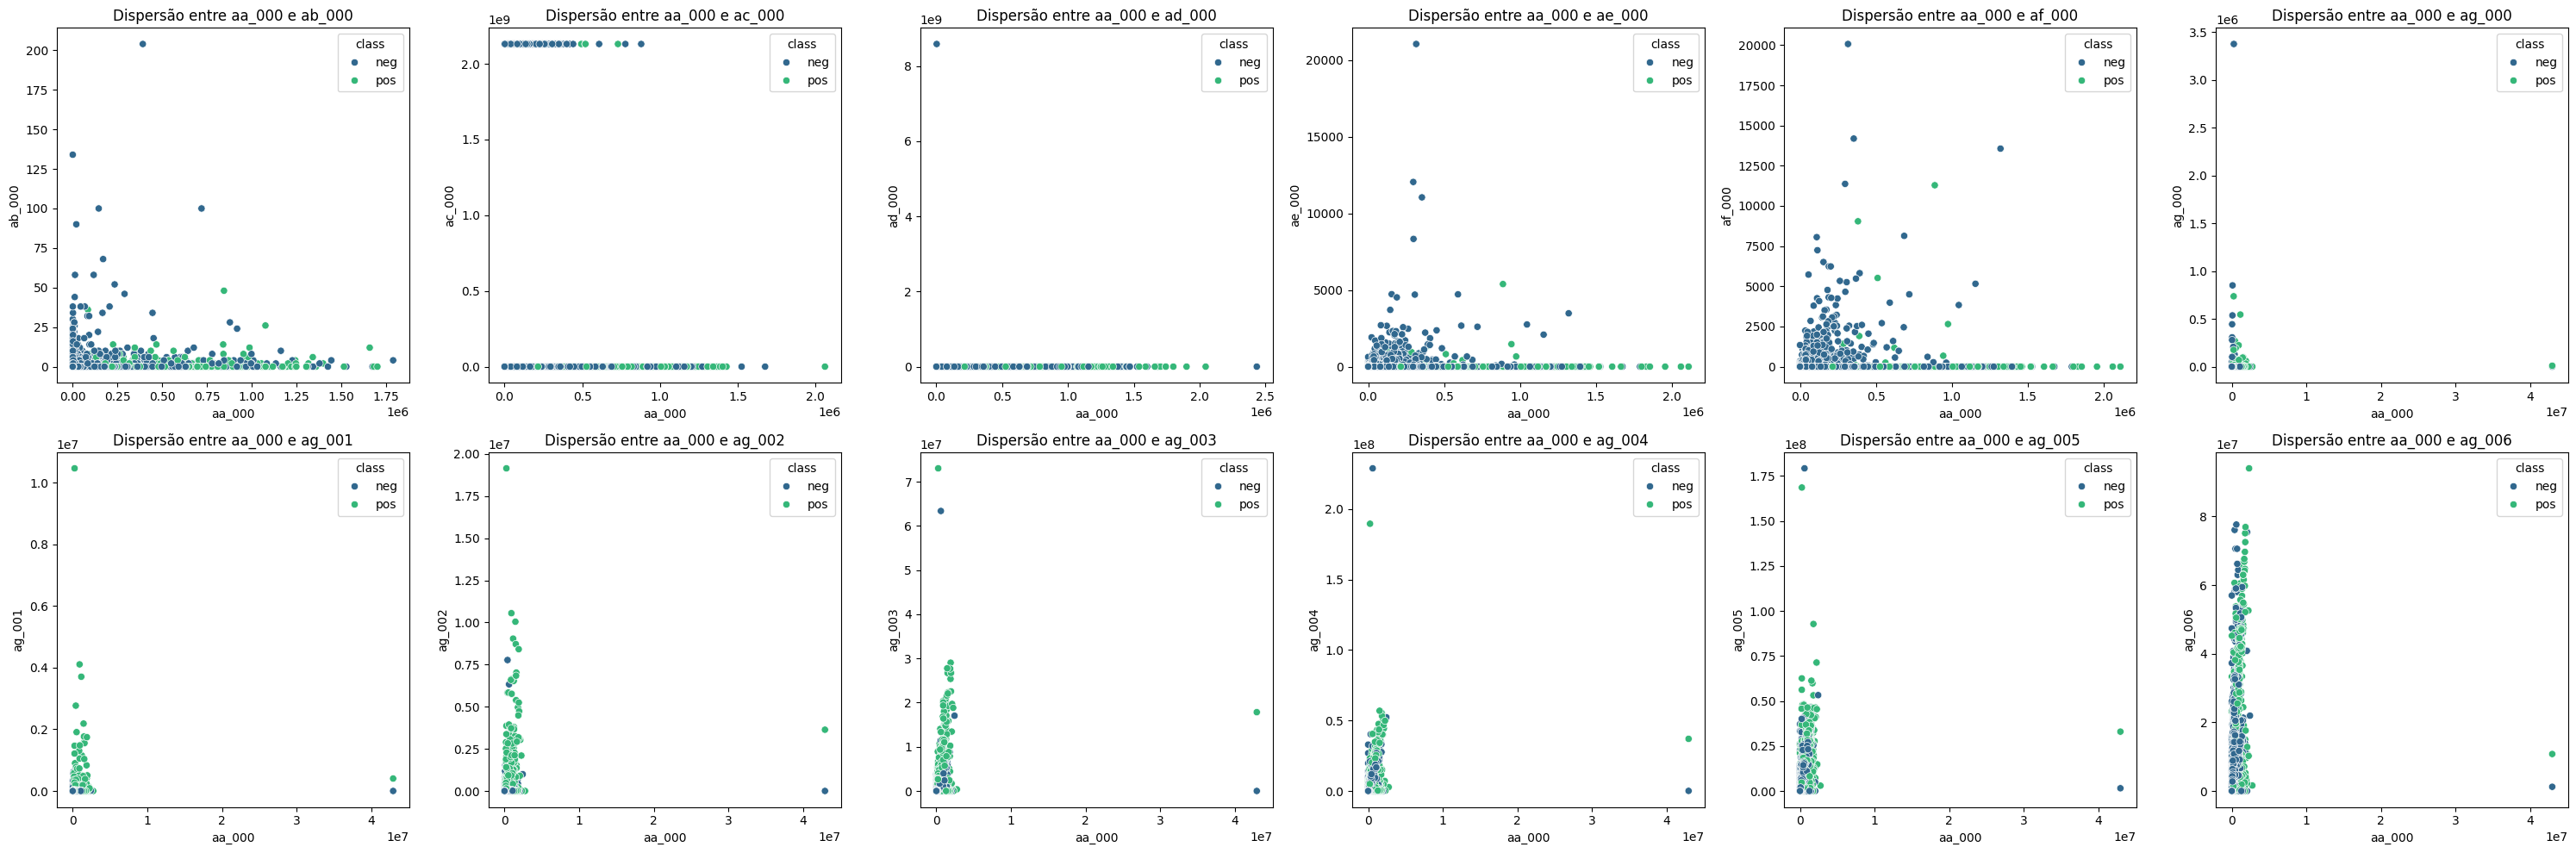

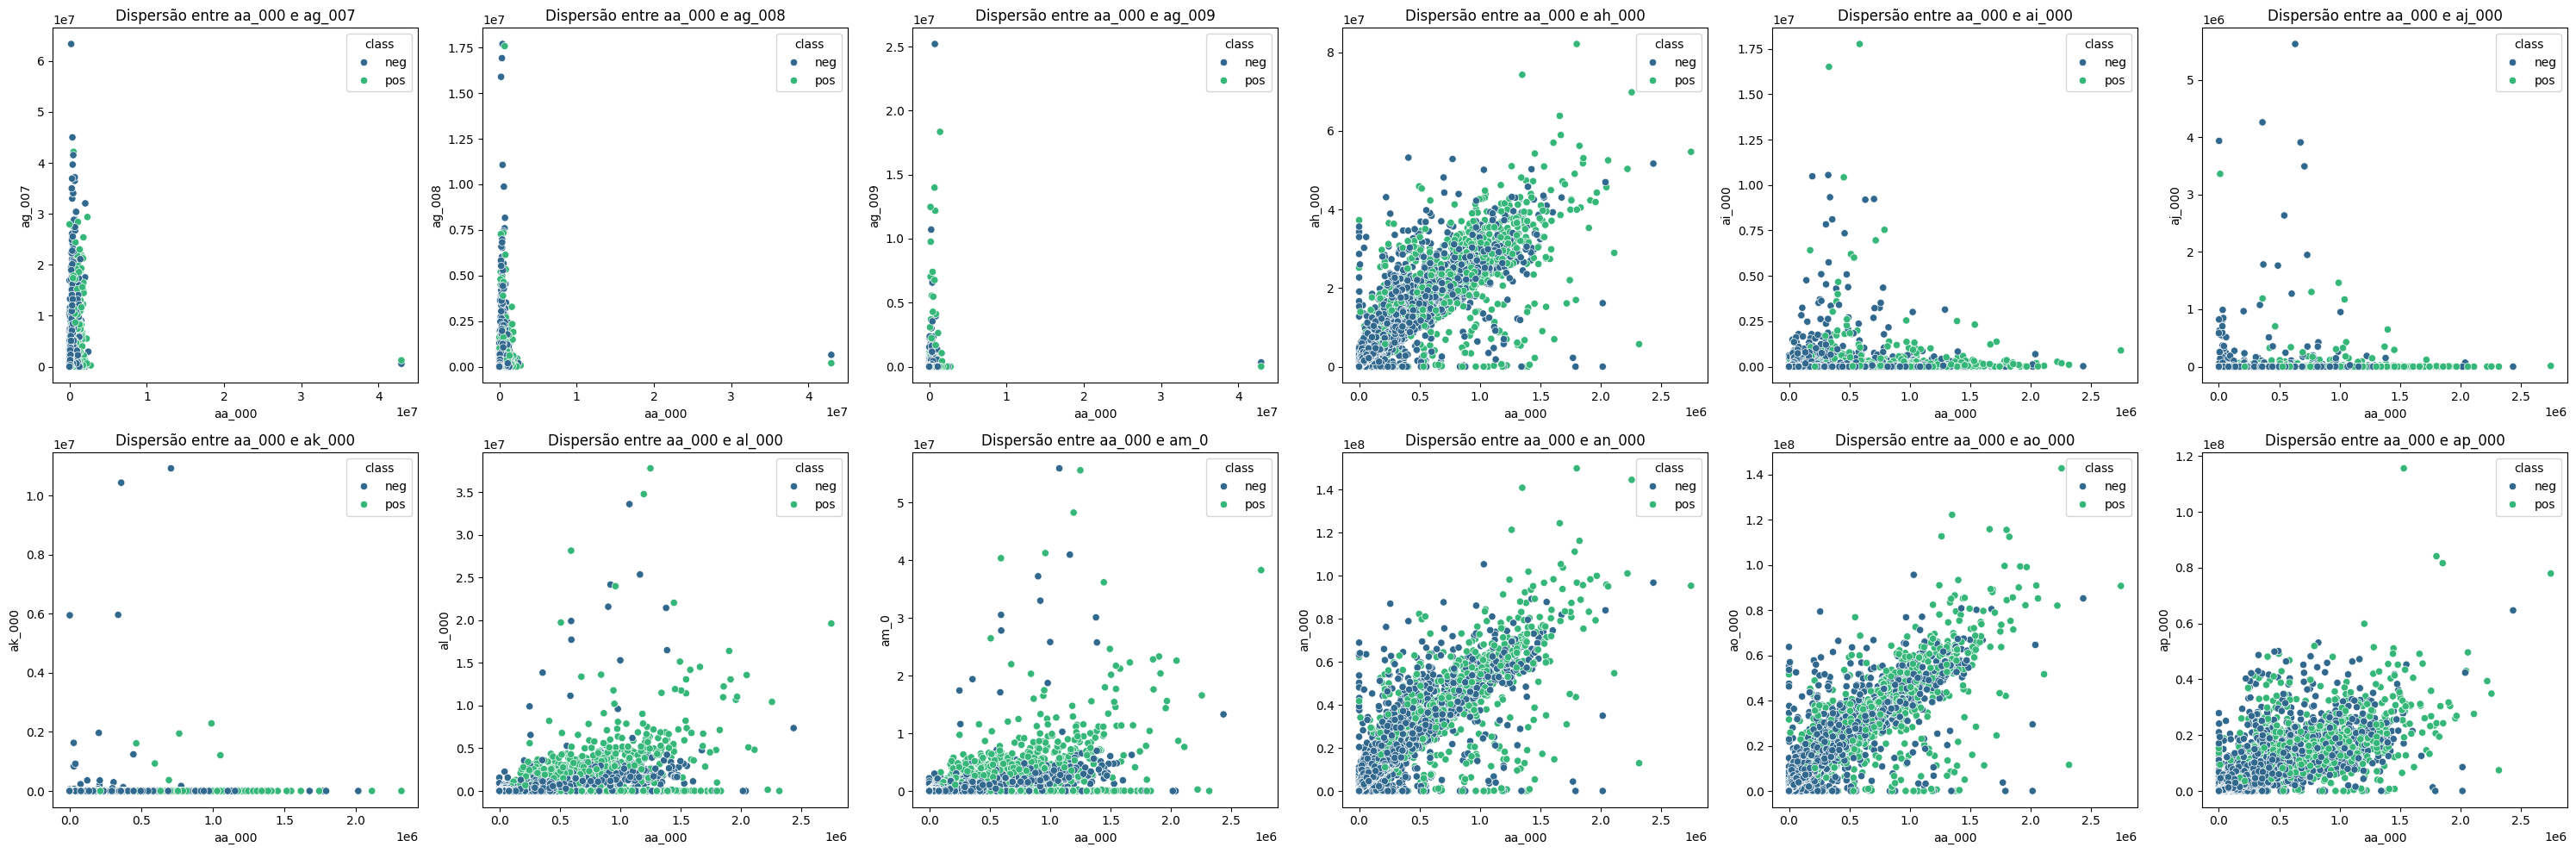

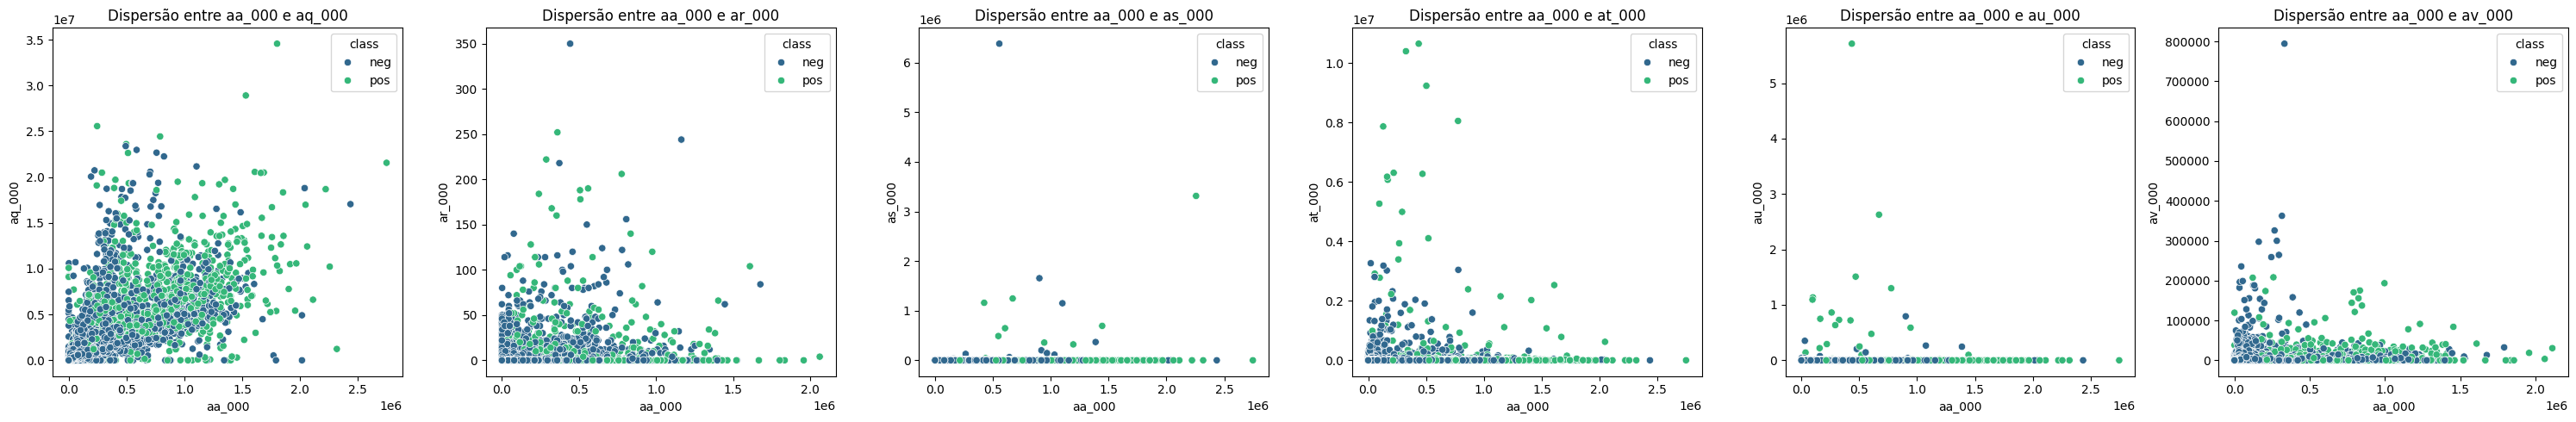

In [ ]:
# Obter todas as features numéricas
numeric_features = df_combined.select_dtypes(include=[np.number]).columns

# Definir o número máximo de gráficos
max_graphs = 30

# Combinações de pares de features numéricas
combinations = list(itertools.combinations(numeric_features, 2))

# Limitar o número de combinações a serem exibidas
combinations = combinations[:max_graphs]

# Definir o número de colunas para a grade de gráficos
num_cols = 6
# Definir o tamanho do lote
batch_size = num_cols * 2

# Número de batches necessários
num_batches = math.ceil(len(combinations) / batch_size)

for batch in range(num_batches):
    # Obter o lote atual de combinações de features
    start = batch * batch_size
    end = start + batch_size
    combinations_batch = combinations[start:end]

    # Definir o número de linhas para a grade de gráficos
    num_rows = math.ceil(len(combinations_batch) / num_cols)

    # Criar uma grade de subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
    axes = axes.flatten()

    # Gerar gráficos de dispersão para o lote atual
    for i, (feature1, feature2) in enumerate(combinations_batch):
        sns.scatterplot(x=feature1, y=feature2, hue='class', data=df_combined, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Dispersão entre {feature1} e {feature2}')
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)

    # Remover subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar o layout
    plt.tight_layout()
    plt.show()



### Análise do DataFrame do Ano Presente:
- **Dimensão**: O DataFrame possui 16.000 linhas e 171 colunas.
- **Tipos de Dados**: Predominantemente, os dados são do tipo `object` (170 colunas), com apenas uma coluna sendo do tipo `int64`.
- **Valores Ausentes**: Não há valores ausentes reportados, o que é positivo para a análise.
- **Amostra dos Dados**: A coluna `'class'` parece ser a variável-alvo com valores 'neg' ou 'pos', indicando se o caminhão tinha defeitos no sistema de ar ou em outros sistemas. As demais colunas possuem uma grande variedade de valores, com muitos zeros e alguns valores 'na' que parecem indicar dados faltantes, apesar de não serem contabilizados como tal na contagem de valores ausentes.

### Análise do DataFrame dos Anos Anteriores:
- **Dimensão**: Este DataFrame é maior, com 60.000 linhas e também 171 colunas.
- **Tipos de Dados**: Similar ao DataFrame do ano presente, com a maioria dos dados sendo do tipo `object`.
- **Valores Ausentes**: Não há valores ausentes reportados oficialmente, mas há 'na' presentes nos dados, indicando possíveis valores faltantes.
- **Amostra dos Dados**: As características são consistentes com as do DataFrame do ano presente, incluindo a presença de muitos zeros e valores 'na'.

### Considerações Gerais:
- **Consistência entre DataFrames**: Ambos os conjuntos de dados têm a mesma estrutura de colunas, o que é bom para análises comparativas e modelagem.
- **Questões de Qualidade de Dados**: A presença de valores 'na' que não são contados como nulos pode exigir uma limpeza adicional, como a conversão desses 'na' para `NaN` para um tratamento mais adequado dos valores ausentes.
- **Variável-Alvo**: A coluna `'class'` é claramente a variável-alvo para o problema de classificação proposto, com duas classes: 'pos' (defeito no sistema de ar) e 'neg' (defeito em outros sistemas).

**Combinação e Preparação dos Dados**

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [73]:
# Carregar os dados
df_present_year = pd.read_csv(path_present_year)
df_previous_years = pd.read_csv(path_previous_years)

In [74]:
# Combinar os DataFrames
df_combined = pd.concat([df_previous_years, df_present_year], ignore_index=True)

In [75]:
# Identificação de características numéricas e categóricas
numeric_features = df_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_combined.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('class')  # Remover a coluna alvo das características categóricas

# Criação de transformadores para o pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Divisão dos dados
X = df_combined.drop('class', axis=1)
y = df_combined['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Configuração do Modelo e Treinamento**

In [76]:
# Pipeline completo com o modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['aa_000']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ab_000', 'ac_000', 'ad_000',
                                                   'ae_000', 'af_000', 'ag_000',
                                                   'ag_001', 'ag_002', 'ag_003',
                                                   'ag_004', 'ag_005', 'ag_006',
                                                   'ag_007', 'ag_008', 'ag_009',
                                                   'ah_000', 'ai_000', 'aj_000',
                                                   'ak_000', 'al_000', 'am_0',
                                                   'an_000', 'ao_000', 'ap_000',
                                                   'aq_000', 'ar_000', 'as_000',
                                                   'at_000', 'au_000', 'av_000', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Avaliação do Modelo**

Avaliação do Modelo
Acurácia: 0.9824
Precisão: 0.9760
Recall: 0.5535
F1-Score: 0.5919
AUC-ROC: 0.9129


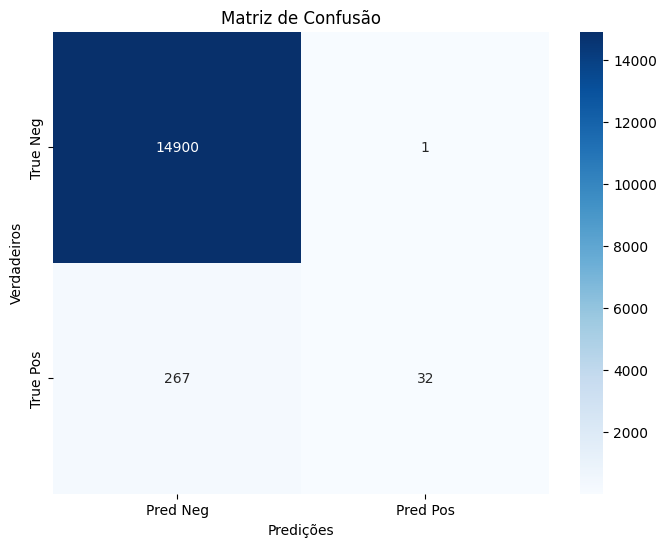

In [77]:
# Avaliar o modelo
y_pred = pipeline.predict(X_test)
prob_predictions = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, prob_predictions)

print("Avaliação do Modelo")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Verdadeiros')
plt.show()


**Validação Cruzada**

In [79]:
from sklearn.model_selection import cross_validate

In [80]:
# Configuração para calcular múltiplas métricas numa única passagem de validação cruzada
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Aplicação da validação cruzada
scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)

print("Avaliação usando validação cruzada")
print("Validação cruzada - Acurácias:", scores['test_accuracy'])
print("Média da Acurácia:", scores['test_accuracy'].mean())
print("Validação cruzada - Precisão:", scores['test_precision_macro'])
print("Média da Precisão:", scores['test_precision_macro'].mean())
print("Validação cruzada - Recall:", scores['test_recall_macro'])
print("Média do Recall:", scores['test_recall_macro'].mean())
print("Validação cruzada - F1-Score:", scores['test_f1_macro'])
print("Média do F1-Score:", scores['test_f1_macro'].mean())


Avaliação usando validação cruzada
Validação cruzada - Acurácias: [0.98453947 0.98407895 0.98440789 0.98460526 0.98375   ]
Média da Acurácia: 0.9842763157894737
Validação cruzada - Precisão: [0.99224934 0.99202215 0.99218441 0.99228181 0.96067379]
Média da Precisão: 0.9858823003644741
Validação cruzada - Recall: [0.57272727 0.56       0.56909091 0.57454545 0.55447845]
Média do Recall: 0.5661684178468098
Validação cruzada - F1-Score: [0.62307853 0.60312185 0.61746717 0.62585772 0.59361593]
Média do F1-Score: 0.6126282407930267


### Interpretação dos Resultados de Avaliação do Modelo

#### Avaliação no Conjunto de Teste
- **Acurácia (0.9824)**: O modelo alcançou uma acurácia muito alta, indicando que ele é capaz de classificar corretamente a maioria dos casos no conjunto de teste. Isso sugere uma boa performance geral, com o modelo acertando as previsões em quase 98% das vezes.
- **Precisão (0.9760)**: A alta precisão sugere que, quando o modelo prediz uma classe, essa previsão é correta na maioria das vezes. Essa métrica é particularmente importante em situações onde o custo de um falso positivo é alto.
- **Recall (0.5535)**: O recall relativamente baixo indica que o modelo tem dificuldades em identificar todos os verdadeiros positivos. Isso significa que muitos casos positivos estão sendo perdidos, o que pode ser crítico dependendo da aplicação do modelo.
- **F1-Score (0.5919)**: O F1-Score, que é uma média harmônica entre precisão e recall, reflete um desempenho moderado do modelo na balança entre precisão e capacidade de detecção. Este valor sugere que melhorias são necessárias para equilibrar melhor essas duas métricas.
- **AUC-ROC (0.9129)**: O valor de AUC-ROC é bastante alto, indicando que o modelo tem uma boa capacidade de discriminar entre as classes positivas e negativas. Isso é um indicativo positivo da qualidade do modelo, apesar dos desafios com o recall.

#### Avaliação Usando Validação Cruzada
- **Acurácias (Média: 0.9843)**: As acurácias obtidas em diferentes dobras da validação cruzada são consistentemente altas e muito próximas entre si, reforçando a robustez do modelo em diferentes subsets do conjunto de dados.
- **Precisão (Média: 0.9859)**: Assim como a acurácia, a precisão média é alta, com resultados consistentes em todas as dobras, exceto uma onde a precisão foi notavelmente mais baixa (0.9607). Este desvio pode necessitar de investigação para entender se alguma característica específica dos dados nessa dobra influenciou a precisão.
- **Recall (Média: 0.5662)**: O recall durante a validação cruzada apresentou pequenas variações, permanecendo em geral mais baixo do que desejável, o que confirma a tendência observada na avaliação do conjunto de teste.
- **F1-Score (Média: 0.6126)**: Os F1-Scores das dobras variam, mas em média indicam uma performance razoável. Assim como no teste, o F1-Score aponta para a necessidade de melhoria no equilíbrio entre precisão e recall.

### Conclusão
Os resultados indicam que enquanto o modelo é altamente preciso e eficaz em classificar corretamente a grande maioria dos casos (como evidenciado pela alta acurácia e AUC-ROC), ele luta para identificar todos os casos positivos efetivamente (baixo recall). Essa característica pode ser particularmente desafiadora em aplicações onde identificar todos os casos positivos é crucial. A consistência nas métricas de validação cruzada reforça a confiabilidade do modelo, apesar da área de melhoria identificada no recall e no F1-Score.

**Cálculo do Impacto Financeiro:**


Para calcular o impacto financeiro com base no desempenho do modelo de previsão, vamos considerar os custos associados à manutenção corretiva e preventiva dos sistemas de ar dos caminhões, conforme as premissas do problema.

- **Se um caminhão for enviado para manutenção e não mostrar nenhum defeito nesse sistema:** cerca de 10 dolares serão cobrados pelo tempo gasto durante a inspeção da equipe especializada.
- **Se um caminhão for enviado para manutenção e estiver com defeito nesse sistema:** 25 dolares serão cobrados para executar o serviço de reparo preventivo.
- **Se um caminhão com defeitos no sistema de ar não for enviado diretamente para manutenção:** a empresa paga 500 dolares para realizar a manutenção corretiva da mesma.

Usaremos esses valores para calcular o impacto financeiro baseado nas previsões do modelo (verdadeiros positivos, falsos positivos, verdadeiros negativos, falsos negativos).

### Passos para o Cálculo do Impacto Financeiro

1. **Obter Valores da Matriz de Confusão**:
   - Verdadeiros Positivos (TP): Casos corretamente identificados como defeituosos.
   - Falsos Positivos (FP): Casos incorretamente identificados como defeituosos.
   - Verdadeiros Negativos (TN): Casos corretamente identificados como não defeituosos.
   - Falsos Negativos (FN): Casos defeituosos que não foram identificados pelo modelo.

2. **Calcular Custos**:
   - Custo de Falsos Positivos: Cada FP resulta em um custo de inspeção desnecessária de 10 dolares.
   - Custo de Falsos Negativos: Cada FN resulta em um custo de manutenção corretiva de 500 dolares.
   - Custo de Verdadeiros Positivos: Cada TP resulta em um custo de reparo preventivo de 25 dolares.

3. **Fórmula do Impacto Financeiro**:
   \[ \text{Impacto Financeiro} = (FP \times 10) + (FN \times 500) + (TP \times 25) \]


### Interpretação dos Resultados
Este cálculo dará uma visão clara do custo direto associado ao desempenho do modelo em termos financeiros. Esses insights podem ser usados para avaliar a viabilidade econômica do modelo, ajustar estratégias de manutenção e justificar melhorias no modelo para reduzir custos futuros, especialmente ao minimizar falsos negativos, que têm o maior impacto financeiro por ocorrência.

In [84]:
from sklearn.metrics import confusion_matrix

# Realizar previsões no conjunto de teste
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Deconstruir a matriz de confusão
TN, FP, FN, TP = cm.ravel()

# Cálculo dos custos baseado nos resultados da matriz de confusão
custo_FP = FP * 10  # Custo por falsos positivos
custo_FN = FN * 500  # Custo por falsos negativos
custo_TP = TP * 25  # Custo por verdadeiros positivos

# Cálculo do impacto financeiro total
impacto_financeiro = custo_FP + custo_FN + custo_TP

# Exibição dos resultados
print(f"Impacto Financeiro Total: ${impacto_financeiro}")
print(f"Custo por Falso Positivo: ${custo_FP} (Inspeções desnecessárias)")
print(f"Custo por Falso Negativo: ${custo_FN} (Manutenções corretivas)")
print(f"Custo por Verdadeiro Positivo: ${custo_TP} (Reparos preventivos)")


Impacto Financeiro Total: $134310
Custo por Falso Positivo: $10 (Inspeções desnecessárias)
Custo por Falso Negativo: $133500 (Manutenções corretivas)
Custo por Verdadeiro Positivo: $800 (Reparos preventivos)


### **Análise Descritiva do Impacto Financeiro Associado ao Desempenho do Modelo**

A avaliação financeira das previsões do modelo de machine learning oferece insights valiosos sobre como o desempenho do modelo afeta diretamente os custos operacionais da manutenção dos sistemas de ar em caminhões. A seguir, detalhamos como cada componente do impacto financeiro está intrinsecamente vinculado ao desempenho do modelo.

### 1. **Custo por Falso Positivo ($10)**

* O custo gerado por falsos positivos é relativamente baixo, indicando que o modelo tem uma alta precisão. Isso significa que, na maioria das vezes, quando o modelo prediz que um caminhão tem um defeito no sistema de ar, essa previsão é correta. O baixo custo de $10 associado a falsos positivos sugere que o modelo raramente alerta incorretamente sobre a necessidade de inspeções, evitando assim gastos desnecessários com verificações que não seriam necessárias. Este é um indicativo de que o modelo é eficiente em maximizar a utilização dos recursos de manutenção, focando as atenções da equipe de manutenção apenas quando há uma probabilidade significativa de defeito.

### 2. **Custo por Falso Negativo ($133,500)**

* O alto custo associado aos falsos negativos é um indicativo preocupante. Quando o modelo falha em identificar um defeito real no sistema de ar dos caminhões, o custo de uma manutenção corretiva necessária posteriormente é substancialmente mais alto, chegando a $133,500. Este custo elevado é um reflexo direto da gravidade de não detectar problemas que poderiam ser corrigidos preventivamente por um custo muito menor. O alto número de falsos negativos sugere que o modelo precisa ser melhorado em termos de sensibilidade ou recall, para reduzir a ocorrência de situações onde defeitos reais não são identificados a tempo.

#### 3. **Custo por Verdadeiro Positivo ($800)**

* O custo dos verdadeiros positivos, embora significativo, é consideravelmente menor comparado ao dos falsos negativos. Cada verdadeiro positivo incide em um custo de $800, que corresponde ao reparo preventivo necessário. Este custo reflete uma gestão eficaz dos recursos, onde o modelo corretamente identifica e permite a correção de defeitos antes que eles se agravem. A capacidade do modelo de identificar corretamente defeitos reais justifica os investimentos em tecnologia de predição, pois cada defeito identificado e corrigido preventivamente pode potencialmente salvar a empresa de despesas muito mais significativas.

### **Conclusão**

A análise do impacto financeiro revela que, embora o modelo seja altamente preciso (como visto nos baixos custos de falsos positivos), ele precisa ser melhorado para detectar mais consistentemente os casos reais de defeitos (reduzindo os custos de falsos negativos). O equilíbrio entre manter a precisão e aumentar o recall é crucial para maximizar a eficácia financeira do modelo. Investir em melhorias no modelo pode reduzir significativamente os custos operacionais, tornando a manutenção preventiva mais efetiva e minimizando a necessidade de intervenções corretivas caras.

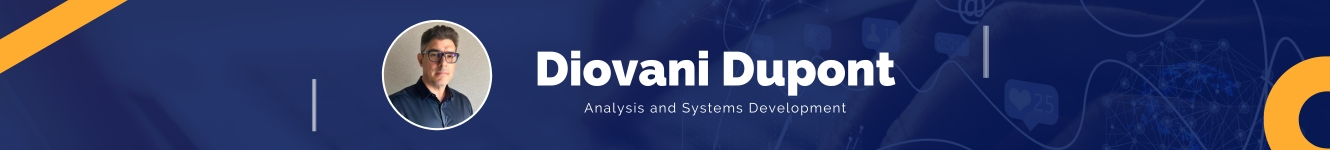
